In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import KFold, train_test_split
import itertools
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


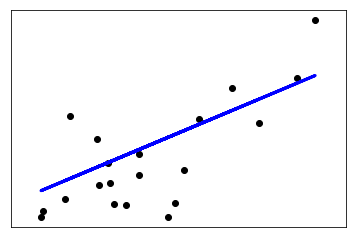

In [6]:
""" Question 1): a). Execute the original example. 

Step 1:
The original examole only used one feature

"""  

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2] # Taking the 3rd column (feature) and reshape it into 442 by 1, using np.newaxis. 

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:] # Setting test data as the last 20 instances. 

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [7]:
""" Question 1): b). Perform regression for all the features.  

Step 1: Inspect the data to determine how many features. 

"""
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
print("Shape of features' data: \n{}".format(diabetes.data.shape))

# Write the data into panda dataframe for easier furthur process.
df = pd.DataFrame(diabetes.data)

# Get the columns names for further manipulation. 
col = list(df.columns.values)
print(col)
print()

# Independent variable dataframe X.
X = df.as_matrix(columns = col)

# Target.
y_train = diabetes.target[:-20]
y_test = diabetes.target[-20:]

length = len(y_test)
print(length)
# Split the data into training/testing sets
X_train = X[:-20][:]
X_test = X[-20:][:]
"""#print(X_train)
print(X_train.shape)
print(X_test.shape)"""

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print()

# Sum of squared error, aka residual sum of squares. 
print("Sum of squared error, aka residual sum of squares.: %.2f"
      % (mean_squared_error(y_test, y_pred)*length))
print()

# Explained variance score: a result of 1 denotes a perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Shape of features' data: 
(442, 10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

20
Coefficients: 
 [  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]
Mean squared error: 2004.57

Sum of squared error, aka residual sum of squares.: 40091.35

Variance score: 0.59


In [8]:
""" Question 1): Prediction power comparison.  

Step 2: Compare the prediction power with more features.

According to the variance score, when the model is fed with more features, the variance coverage increases by 23.81%. 
And according to the MSE, the prediction accuracy increases by 0.21%.

"""

# R-squared comparison.
addition = np.absolute((r2_score(diabetes_y_test, diabetes_y_pred))-(r2_score(y_test, y_pred)))
diff = addition/r2_score(diabetes_y_test, diabetes_y_pred)*100
print("Prediction power in terms of variance coverage increased by {}% based on R-squared comparison.".format(np.round(diff,2)))

# MSE comparison. 
decrease = np.absolute((mean_squared_error(y_test, y_pred))-(mean_squared_error(diabetes_y_test, diabetes_y_pred)))
diff_mse = decrease/(mean_squared_error(diabetes_y_test, diabetes_y_pred))
print("Prediction power in terms of accuracy increased by {}% based on MSE comparison.".format(np.round(diff_mse,2)))

Prediction power in terms of variance coverage increased by 23.81% based on R-squared comparison.
Prediction power in terms of accuracy increased by 0.21% based on MSE comparison.


In [9]:
""" Question 1): c). 10-folds Cross validation. METHOD ONE: Manually do the 10-folds cross validation.

Step 3: 
 i. Since I have 442 samples, in order to divide the dataset into 10 equal-size folds, I need to randomly drop 2 instance. 

"""

np.random.seed(10)

# Set the number of samples to be removed.
remove_n = 2

# Randomly choose remove_n number of index from dataframe.
drop = np.random.choice(df.index, remove_n, replace=False)

# Drop rows that are randomly chosen based on indexes, for fearure data.
df = pd.DataFrame(diabetes.data)
df_new = df.drop(drop)

# Drop the same rows in target data.
# Write target into panda dataframe for easier furthur process.
df_target = pd.DataFrame(diabetes.target)
df_target_new = df_target.drop(drop)


In [10]:
""" Question 1): c). 10-folds Cross validation. METHOD ONE: Manually do the 10-folds cross validation.

Step 3: 
 2. Split the index into 10 folds, so that I can devide the data with indexes.  

"""

# Split df_new with np.vsplit, thus I need to convert the dataframe into np array first.
n = len(df_target_new)
array = np.arange(n).reshape((n, 1))
#print(array)

split = np.vsplit(array, 10)

In [26]:
""" Question 1): c). 10-folds Cross validation. METHOD ONE: Manually do the 10-folds cross validation.

Step 3: 
 3. Perform the Cross-Validation. 
 
"""

Original_X = df_new.as_matrix()

# Create linear regression object
regr = linear_model.LinearRegression()

R2_Manually = []
for i in range(10):
    print("****************Fold {} as the test dataset*******************".format(i))

    X_train = np.delete(Original_X, (split[i].tolist()), axis=0)
    X_step_1 = Original_X[split[i].tolist(),]
    
    X_test = np.squeeze(X_step_1)

    y_train = np.delete(np.array(df_target_new), (split[i].tolist()), axis=0)
    y_step_1 = np.array(df_target_new)[split[i].tolist(),]
    
    y_test = np.squeeze(y_step_1)
    
    regr.fit(X_train, y_train)
    
    y_pred = regr.predict(X_test)
    
    print('Coefficients: \n', regr.coef_)

    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(y_test, y_pred))
    
    # Explained variance score: a result of 1 denotes a perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, y_pred))
    R2_Manually.append(r2_score(y_test, y_pred))
    
    print()
    
print(R2_Manually)

****************Fold 0 as the test dataset*******************
Coefficients: 
 [[  -7.57217804 -227.31830298  530.81213222  322.25242088 -628.38191361
   395.25489411   -9.09589389  125.15221739  642.3265809    81.82766809]]
Mean squared error: 2564.58
Variance score: 0.54

****************Fold 1 as the test dataset*******************
Coefficients: 
 [[ -21.76523725 -219.19528148  531.88792813  328.95641169 -908.92227095
   584.05987594  140.85798014  178.26157321  787.77249995   80.9882284 ]]
Mean squared error: 2917.47
Variance score: 0.28

****************Fold 2 as the test dataset*******************
Coefficients: 
 [[  42.35644654 -225.81344762  532.86776186  331.54605834 -984.55276633
   595.56711433  238.44463302  277.75499874  817.56581657   31.2531031 ]]
Mean squared error: 3460.48
Variance score: 0.38

****************Fold 3 as the test dataset*******************
Coefficients: 
 [[ -24.92275568 -246.62450583  508.90645648  330.80881808 -494.52086592
   274.17581092  -62.3197079

In [30]:
""" Question 1): c). 10 folds Cross-validation. Method 2: KFold function in SKlearn.

Step 3: 

Reference: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

"""

# Read in features and target as dataframe.
df = pd.DataFrame(diabetes.data)
df_target = pd.DataFrame(diabetes.target)

# Inditiate KFold.
kf = KFold(n_splits=10)

# Split data into 10 folds.
s = kf.split(df)
n = kf.get_n_splits(df)
print("Splitted into {} folds".format(n))

# Initiate regression.
# Create linear regression object
regr = linear_model.LinearRegression()

R2_KFold = []
# Cross-validation.
for train_index, test_index in kf.split(df, df_target):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = df.iloc[train_index], df.iloc[test_index]
    y_train, y_test = df_target.iloc[train_index], df_target.iloc[test_index]
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    # Predict.
    y_pred = regr.predict(X_test)
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f" 
          % mean_squared_error(y_test, y_pred))
    print()
    # Explained variance score: a result of 1 denotes a perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, y_pred))
    #Create a list of variance scores for each fold to answer question d.
    R2_KFold.append(r2_score(y_test, y_pred))
    
#print()
#print(R2)

    

Splitted into 10 folds
Coefficients: 
 [[  -9.35207221 -231.25935869  522.28500451  322.9065529  -633.34781888
   401.62150256   -8.76480774  115.25791809  650.39226132   88.66074286]]
Mean squared error: 2533.85

Variance score: 0.56
Coefficients: 
 [[ -21.11846535 -215.88640593  529.35821161  323.83044314 -948.59584272
   607.30739517  162.55714013  189.10624282  803.30840477   86.70881806]]
Mean squared error: 2870.77

Variance score: 0.23
Coefficients: 
 [[  44.59538444 -230.20810407  533.18081477  335.16932957 -989.99143477
   602.00982274  239.60713172  279.80132481  820.70907004   25.69869348]]
Mean squared error: 3512.72

Variance score: 0.35
Coefficients: 
 [[ -24.3926342  -247.60708344  503.88724153  330.70556115 -509.97724606
   283.36701109  -55.56622118   83.0034667   672.09717696   40.25679542]]
Mean squared error: 2759.23

Variance score: 0.62
Coefficients: 
 [[ -27.31113259 -246.61849223  509.69607756  348.08394708 -843.83610246
   532.00664814   99.61898966  150.546281

In [27]:
""" Question 1): d). 10 folds Cross-validation variance scores.  

Step 4: 
i. Calculate the results from the maually method.

"""

R2 = R2_Manually

# Properties for 10-folds cross validation variance scores. 
average = np.mean(R2)
maximum = np.max(R2)
minimum = np.min(R2)
std = np.std(R2)
print("Average of variance scores for the 10-folds : {}".format(average))
print("Range of variance scores for the 10-folds : [{},{}]".format(minimum, maximum))
print("Standard Deviation of variance scores for the 10-folds : {}".format(std))


Average of variance scores for the 10-folds : 0.46965939331299217
Range of variance scores for the 10-folds : [0.2785956941543818,0.685639520994716]
Standard Deviation of variance scores for the 10-folds : 0.1352706995337737


In [31]:
""" Question 1): d). 10 folds Cross-validation variance scores.  

Step 4: 
ii. Calculate the results from the KFold method.

Noted that the Kfold and Mannually methods are different, this is the main reasons:
- I took out the 3 extra data points randomly from the original dataset, while the KFold is handling the problem automatically. 

"""

R2 = R2_KFold

# Properties for 10-folds cross validation variance scores. 
average = np.mean(R2)
maximum = np.max(R2)
minimum = np.min(R2)
std = np.std(R2)
print("Average of variance scores for the 10-folds : {}".format(average))
print("Range of variance scores for the 10-folds : [{},{}]".format(minimum, maximum))
print("Standard Deviation of variance scores for the 10-folds : {}".format(std))


Average of variance scores for the 10-folds : 0.4619623619583371
Range of variance scores for the 10-folds : [0.23056091914863153,0.6856851417427137]
Standard Deviation of variance scores for the 10-folds : 0.14698789185375874


In [32]:
""" Question 1): d). Fit a regression model to all the data.  

Step 5: Fit a regression model to all the data. 

Noted that even this is a statistical method other than a Machine Learning method, I still fitted the data with LinearRegression().
But instead of divide the whole dataset into test and train, I fitted the model with the whole dataset, 
and use all the data to predict, and calculate the MSE and R2 based on the dredicted data and origial whole target data. 


"""

# Fit all the data for a regression.
# Initiate regression.
regr = linear_model.LinearRegression()

regr.fit(df, df_target)

X = df
y = df_target

y_pred = regr.predict(X)
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))
print()
# Explained variance score: a result of 1 denotes a perfect prediction
print('Variance score: %.2f' % r2_score(y, y_pred))
#Create a list of variance scores for each fold to answer question d.


Coefficients: 
 [[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
   476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]]
Mean squared error: 2859.69

Variance score: 0.52


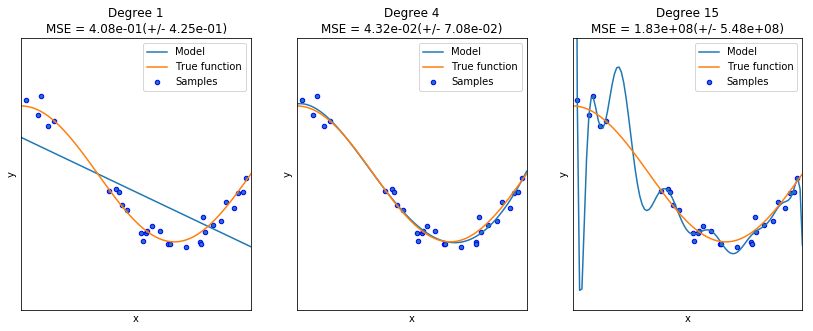

In [33]:
""" Question 2):

Step 1: Execute the sample codes and comment the functions for each line of code.

"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Define the true function, which is a cosine function. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# Use random.seed to make sure everytime we randomly chose the same set of data in order to better compare the results. 
np.random.seed(0)

# Set up number of samples and degrees.
n_samples = 30
degrees = [1, 4, 15] # In polynomial function, if degree = 1, then it is linear.

# Genertae 30 random samples, and order them by using np.sort. 
X = np.sort(np.random.rand(n_samples))
# Generate y, with true_fun(), which is the true function, PLUS noise, using np.random.randn().
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    # Set the figure position: this is a 1 by 3 figure. 
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=()) # Set up the figure property: no x or y ticks. 
    
    # Iterate through different degrees: 1, 4, 15, and generate polynomial features. 
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    # Initiate LinearRegression().
    linear_regression = LinearRegression()
    # Use preprocessing.pipeline to transform and fit data in a more comparable way. 
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    # Fit the the model with the order in the pipeline: first generate polynomial features and then perform linear regression
    pipeline.fit(X[:, np.newaxis], y) # And use np.newaxis to reshape the X. 
    
    # Evaluate the models using crossvalidation: model_selection.cross_val_score()
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100) # Set the test data set within range [0,1], with even steps and a total step of 100. 
    
    # Plot predicted regression line:
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # Plot true line:
    plt.plot(X_test, true_fun(X_test), label="True function")
    # Plot the data with noises:
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    # Set lables and axis limits:
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    # Set legend
    plt.legend(loc="best")
    # Set title
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))

plt.show() # Print out the figures. 

In [34]:
""" Question 2):

Step 2: Calculate AIC and BIC.

Since these are statistical measurment, I fitted the model with all data to calculate the AIC and BIC. 

"""
np.random.seed(0)

# K should be the number of features plus one. 
k = 1+1
n = n_samples

# Set the test data set within range [0,1], with even steps and a total step of 100. 

# Genertae 30 random samples, and order them by using np.sort. 
X = np.sort(np.random.rand(n_samples))
# Generate y, with true_fun(), which is the true function, PLUS noise, using np.random.randn().
y = true_fun(X) + np.random.randn(n_samples) * 0.1

for i in range(len(degrees)):
    # Iterate through different degrees: 1, 4, 15, and generate polynomial features. 
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    # Initiate LinearRegression().
    linear_regression = LinearRegression()
    # Use preprocessing.pipeline to transform and fit data in a more comparable way. 
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    # Fit the the model with the order in the pipeline: first generate polynomial features and then perform linear regression
    pipeline.fit(X[:, np.newaxis], y) # And use np.newaxis to reshape the X. 
    
    # Predict with all data.     
    y_pred = pipeline.predict(X[:, np.newaxis])
    mean_sq_er_total = mean_squared_error(true_fun(X), y_pred)

    # AIC and BIC for All coefficients
    aic_total = (2*k) + n * np.log(mean_sq_er_total)
    print("AIC for all coefficients with degrees of {} in PolynomialFeature is:\n{} ".format(i, aic_total))
    bic_total = k * np.log(n) + n * np.log(mean_sq_er_total)
    print("BIC for all coefficients with degrees of {} in PolynomialFeature is:\n{} ".format(i, bic_total))
    print("*******************************************")
    print()


AIC for all coefficients with degrees of 0 in PolynomialFeature is:
-41.59329815466777 
BIC for all coefficients with degrees of 0 in PolynomialFeature is:
-38.79090339134346 
*******************************************

AIC for all coefficients with degrees of 1 in PolynomialFeature is:
-190.3629780276827 
BIC for all coefficients with degrees of 1 in PolynomialFeature is:
-187.56058326435837 
*******************************************

AIC for all coefficients with degrees of 2 in PolynomialFeature is:
-142.86740758813883 
BIC for all coefficients with degrees of 2 in PolynomialFeature is:
-140.06501282481452 
*******************************************



In [ ]:
"""
************************************************QUESTION 3: MPG AUTO************************************************************
"""

In [35]:
""" Question 3: a. Clean the data, removing samples with empty entries and scaling each feature to have zero mean and unit variance

Step 1: read in data file.

Columns should be named as the following: 

1. mpg: continuous 
2. cylinders: multi-valued discrete 
3. displacement: continuous 
4. horsepower: continuous 
5. weight: continuous 
6. acceleration: continuous 
7. model year: multi-valued discrete 
8. origin: multi-valued discrete 
9. car name: string (unique for each instance)

"""

read=pd.read_csv('auto_mpg.data', delim_whitespace = True,
               names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "accerleration", "model year", "origin", "car name"]) 
                 
data = read.drop(['car name'], axis=1, inplace = False)
print(data.shape)
data.head(8)


(398, 8)


,mpg,cylinders,displacement,horsepower,weight,accerleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1


In [36]:
""" Question 3: a. Clean the data, removing samples with empty entries and scaling each feature to have zero mean and unit variance

Step 2: Clean the data

1). Noted that in the original dataset, categorical column "origin" is stored as numerical, I need to convert them into string. 
2). Check datatype.
3). Drop NANs and other data that does not make sense. 

"""

# Convert 'origin' column into string:
data['origin'] = data['origin'].astype(str)

# Clean data: check first if there is any NANs.
print(data.isnull().any()) # No NAN. If there is any, comment out the following. 
#df = data.dropna(how='all')
print()

col = list(data.columns.values)
print("Columns names: \n{}".format(col))
print()

# Check each column's type: noted that horsepower is str. 
for column in col:
    print("Type for column {}: {}".format(column, type(data[column][0])))
    
print()
    
# Check the string: I found '?' in there, which cannot be converted to numeirc. 
index_list = data['horsepower'].index[data['horsepower'] == '?'].tolist()
print("Index that containing special characters:\n{}".format(index_list))
print()
print(data.shape)
# Drop the rows with index_list generated above. 
df=data.drop(np.array(index_list))

# Need to reset the index, otherwise the index are gone after the drop. 
df = df.reset_index(drop=True)
print(df.shape)




mpg              False
cylinders        False
displacement     False
horsepower       False
weight           False
accerleration    False
model year       False
origin           False
dtype: bool

Columns names: 
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'accerleration', 'model year', 'origin']

Type for column mpg: <class 'numpy.float64'>
Type for column cylinders: <class 'numpy.int64'>
Type for column displacement: <class 'numpy.float64'>
Type for column horsepower: <class 'str'>
Type for column weight: <class 'numpy.float64'>
Type for column accerleration: <class 'numpy.float64'>
Type for column model year: <class 'numpy.int64'>
Type for column origin: <class 'str'>

Index that containing special characters:
[32, 126, 330, 336, 354, 374]

(398, 8)
(392, 8)


In [37]:
""" Question 3: a. Clean the data, removing samples with empty entries and scaling each feature to have zero mean and unit variance

Step 3:

1. Rewrite columns into their normalized form;
2. Convert string column to numeric column.

"""

for column in col:
    if column != 'horsepower' and column != 'origin':
        mean = df[column].mean()
        std = df[column].std()
        df[column] = (df[column]-mean)/std
    if column == 'horsepower':
        for ele in range(0,len(df['horsepower'])):
            df[column][ele] = (float(df[column][ele]))


df.head(8)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,mpg,cylinders,displacement,horsepower,weight,accerleration,model year,origin
0,-0.697747,1.482053,1.075915,130,0.619748,-1.283618,-1.623241,1
1,-1.082115,1.482053,1.486832,165,0.842258,-1.464852,-1.623241,1
2,-0.697747,1.482053,1.181033,150,0.539692,-1.646086,-1.623241,1
3,-0.953992,1.482053,1.047246,150,0.536160,-1.283618,-1.623241,1
4,-0.825870,1.482053,1.028134,140,0.554997,-1.827320,-1.623241,1
5,-1.082115,1.482053,2.241772,198,1.605147,-2.008554,-1.623241,1
6,-1.210238,1.482053,2.480677,220,1.620452,-2.371022,-1.623241,1
7,-1.210238,1.482053,2.346890,215,1.571005,-2.552256,-1.623241,1


In [38]:
""" Question 3: a. Clean the data, removing samples with empty entries and scaling each feature to have zero mean and unit variance

Step 4: Rewrite horsepower into its standardized form.

Centralize the data by subtracting the mean, then devide the data with standard deviation. 

"""

mean = df['horsepower'].mean()
std = df['horsepower'].std()
df['horsepower'] = (df['horsepower']-mean)/std

df.head(8)

,mpg,cylinders,displacement,horsepower,weight,accerleration,model year,origin
0,-0.697747,1.482053,1.075915,0.663285,0.619748,-1.283618,-1.623241,1
1,-1.082115,1.482053,1.486832,1.57258,0.842258,-1.464852,-1.623241,1
2,-0.697747,1.482053,1.181033,1.18288,0.539692,-1.646086,-1.623241,1
3,-0.953992,1.482053,1.047246,1.18288,0.536160,-1.283618,-1.623241,1
4,-0.825870,1.482053,1.028134,0.923085,0.554997,-1.827320,-1.623241,1
5,-1.082115,1.482053,2.241772,2.42992,1.605147,-2.008554,-1.623241,1
6,-1.210238,1.482053,2.480677,3.00148,1.620452,-2.371022,-1.623241,1
7,-1.210238,1.482053,2.346890,2.87158,1.571005,-2.552256,-1.623241,1


In [45]:
""" Question 3: b. Find the best fit model and print the coeficcient. 

Step 5: 
i.  DictVectorization for categorical features, aka 'origins'. 
ii. Fit the model with LiearRegression() to get the best model for all features. 

Noted that I used the train_test_split here to split up the dataset, the test size is set to be 10% of the total data.
In such way I expected to make it more comparable with the 10-fold CV. 

"""
np.random.seed(0)

# Feature columns:
col = ['cylinders', 'displacement', 'horsepower', 'weight', 'accerleration', 'model year', 'origin']

# Create original X and y:
Original_X = df[col]
Original_y = df['mpg']

# Dict_Vectorize the X: 
dict_data = Original_X.T.to_dict().values()

# Initiate vectorizer
vectorizer = DictVectorizer(sparse=False)

# Transform X and y: y does not need to transform. 
X = vectorizer.fit_transform(dict_data)
y = Original_y

# Use tran_test_split from sklearn to split the test and train. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print()

# Sum of squared error, aka residual sum of squares. 
print("Sum of squared error, aka residual sum of squares.: %.2f"
      % ((mean_squared_error(y_test, y_pred))*len(y_test)))
print()

#print("Residual Sum of squares: %.2f" % np.mean((y_pred - y_test) ** 2))

# Explained variance score: a result of 1 denotes a perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [ 0.046677   -0.08986849  0.30446999 -0.06381986  0.35855809 -0.22516793
  0.09657048  0.12859745 -0.7553884 ]
Mean squared error: 0.17

Sum of squared error, aka residual sum of squares.: 6.82

Variance score: 0.82


In [46]:
""" Question 3: c). Calculate the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) for two models
– one with all coefficients  

Step 6: AIC and BIC for all features. Should also be with all data.

"""

# Fit all data:
# Create original X and y:
Original_X = df[col]
Original_y = df['mpg']

# Dict_Vectorize the X: 
dict_data = Original_X.T.to_dict().values()

# Initiate vectorizer
vectorizer = DictVectorizer(sparse=False)

# Transform X and y: y does not need to transform. 
X = vectorizer.fit_transform(dict_data)
y = Original_y

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y)

# Make predictions using the testing set
y_pred = regr.predict(X)


k = 7+1
n = len(y)

mean_sq_er_total = mean_squared_error(y, y_pred)

# AIC and BIC for All coefficients
aic_total = (2*k) + n * np.log(mean_sq_er_total)
print("AIC for all coefficients is:\n{} ".format(aic_total))
bic_total = k * np.log(n) + n * np.log(mean_sq_er_total)
print("BIC for all coefficients is:\n{} ".format(bic_total))
print("*******************************************")
print()

AIC for all coefficients is:
-666.4561468340506 
BIC for all coefficients is:
-634.686052115727 
*******************************************



In [47]:
""" Question 3: e). Calculate the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) for two models
– one with one coefficient  

Step 7: AIC and BIC for one feature. These are statistical methods, so I fitted the model with all samples. 

From above I know that "weight" has the most significant magnitute in coefficient.
Then X will be weight in this question. 

"""

np.random.seed(0)


# Independent variable dataframe X.
# X = df['accerleration'][:, np.newaxis]
X = df['accerleration'][:, np.newaxis]

y = df['mpg'][:, np.newaxis]

# Use tran_test_split from sklearn to split the test and train. 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# Create linear regression object
regr = linear_model.LinearRegression()

# Fill the model using all samples
regr.fit(X, y)

# Make predictions using the testing set
y_pred = regr.predict(X)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))
print()

# Sum of squared error, aka residual sum of squares. 
print("Sum of squared error, aka residual sum of squares.: %.2f"
      % ((mean_squared_error(y, y_pred))*len(y_test)))
print()

# Explained variance score: a result of 1 denotes a perfect prediction
print('Variance score: %.2f' % r2_score(y, y_pred))
print()

# BIC and AIC: 
k = 1+1
n = len(y)

mean_sq_er_total = mean_squared_error(y, y_pred)

# AIC and BIC for All coefficients
aic_total = (2*k) + n * np.log(mean_sq_er_total)
print("AIC for all coefficients is:\n{} ".format(aic_total))
bic_total = k * np.log(n) + n * np.log(mean_sq_er_total)
print("BIC for all coefficients is:\n{} ".format(bic_total))
print("*******************************************")
print()

Coefficients: 
 [[ 0.42332854]]
Mean squared error: 0.82

Sum of squared error, aka residual sum of squares.: 32.75

Variance score: 0.18

AIC for all coefficients is:
-74.41516012147483 
BIC for all coefficients is:
-66.4726364418939 
*******************************************



In [48]:
""" Question 3:

Step 8: Find a better model based on AIC and BIC. 

1. Define a function to iterate through given numbers of independent variable,
and return variable combinations. 
   a). I set 'weight' as the main independent variable, since it has the highest coefficient.
   b). To simplify the problem, I only use 2 and 6 features, which means to select 1 and 5 variables from list, since there is already a 'weight'.

"""



def models(size):
    # Define other independent variables for me to choose from. 
    Ind = ["cylinders", "displacement", "horsepower", "accerleration", "model year", "origin"]
    # Create the combinations for chosen number of variables. 
    lst_select = list(itertools.combinations(Ind,size))
    print("Model Selected:")
    print()

    # Create the final model selection list. 
    lst_models = []
    for ele in lst_select:
        lst_main = ["weight"]
        lst_main.extend(ele)
        lst_models.append(lst_main)


    print()
    return lst_models




In [49]:
""" Question 3:

Step 8: Find a better model based on AIC and BIC. 

Fit the model with all instances. 

2. Define a function to perform linear regression and caculate the AIC and BIC.
   a). I set 'weight' as the main independent variable, since it has the highest coefficient.
   b). To simplify the problem, I only use 2 and 5 features, which means to select 1 and 4 variables from list, since there is already a 'weight'.

"""

def Linear_IC(model):
    for m in model:
        Original_X = df[m]
        Original_y = df['mpg']
        
        # Dict_Vectorize the X: 
        dict_data = Original_X.T.to_dict().values()

        # Initiate vectorizer
        vectorizer = DictVectorizer(sparse=False)

        # Transform X and y: y does not need to transform. 
        X = vectorizer.fit_transform(dict_data)
        # y does not need to be vectorized, since this is a numerical column.
        y = Original_y
        # Use tran_test_split from sklearn to split the test and train. 
        # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

        # Create linear regression object
        regr = linear_model.LinearRegression()

        # Train the model using the training sets
        regr.fit(X, y)

        # Make predictions using the testing set
        y_pred = regr.predict(X)
        
        k = len(model)+1
        n = len(y)

        mean_sq_er_total = mean_squared_error(y, y_pred)

        # AIC and BIC for All coefficients
        aic_total = (2*k) + n * np.log(mean_sq_er_total)
        print("AIC for {} is:\n{} ".format(m, aic_total))
        bic_total = k * np.log(n) + n * np.log(mean_sq_er_total)
        print("BIC for {} is:\n{} ".format(m, bic_total))
        print("*******************************************")
        print()    
    


In [50]:
Linear_IC(models(5))

Model Selected:


AIC for ['weight', 'cylinders', 'displacement', 'horsepower', 'accerleration', 'model year'] is:
-636.4744577072913 
BIC for ['weight', 'cylinders', 'displacement', 'horsepower', 'accerleration', 'model year'] is:
-608.6756248287581 
*******************************************

AIC for ['weight', 'cylinders', 'displacement', 'horsepower', 'accerleration', 'origin'] is:
-487.19808444062426 
BIC for ['weight', 'cylinders', 'displacement', 'horsepower', 'accerleration', 'origin'] is:
-459.399251562091 
*******************************************

AIC for ['weight', 'cylinders', 'displacement', 'horsepower', 'model year', 'origin'] is:
-667.7928322750048 
BIC for ['weight', 'cylinders', 'displacement', 'horsepower', 'model year', 'origin'] is:
-639.9939993964715 
*******************************************

AIC for ['weight', 'cylinders', 'displacement', 'accerleration', 'model year', 'origin'] is:
-666.6595162219766 
BIC for ['weight', 'cylinders', 'displacement', 'accer

In [46]:
# 2 Features:

Linear_IC(models(1))

Model Selected:


AIC for ['weight', 'cylinders'] is:
-455.6581896347281 
BIC for ['weight', 'cylinders'] is:
-427.85935675619487 
*******************************************

AIC for ['weight', 'displacement'] is:
-457.610871221308 
BIC for ['weight', 'displacement'] is:
-429.81203834277477 
*******************************************

AIC for ['weight', 'horsepower'] is:
-467.3787628362023 
BIC for ['weight', 'horsepower'] is:
-439.5799299576691 
*******************************************

AIC for ['weight', 'accerleration'] is:
-458.56411137934197 
BIC for ['weight', 'accerleration'] is:
-430.76527850080873 
*******************************************

AIC for ['weight', 'model year'] is:
-634.2714586733665 
BIC for ['weight', 'model year'] is:
-606.4726257948332 
*******************************************

AIC for ['weight', 'origin'] is:
-461.6338867584645 
BIC for ['weight', 'origin'] is:
-433.83505387993125 
*******************************************



In [53]:
""" Question 3: g). Use 10-fold cross validation and MSE as a metric to select among these three models. 

Manually Method.

Step 9. 10-fold cross validation

Define a class CrossValidation(), and inside the class, define the function k_fold(k, model_list):
k - number of folds;
model_list: the list containing the column names for the selected features. 

Noted that this class should only be used after the dataframe is defined, cleaned and named as 'df'.

"""

class CrossValidation_Manually():
    
    def __init__(self, model_list): 
        self.inst_attr = "Selected Features for Cross Validation." 
        self.model_list = model_list
    
    def __repr__(self):
        return(print("Selected features: \n{}".format(self.model_list)))

    
    def K_fold(self):
        
        self.R2_Manually = []
        self.MSE_Manually = []
        
        for i in range(10):
            print("****************Fold {} as the test dataset*******************".format(i))

            # Noted that before execute the function, I need the data after the extra datapoints taken out. 
            # Namely, I have df_new and df_target_new. 
            n = len(df_target_new)
            array = np.arange(n).reshape((n, 1))
            #print(array)

            split = np.vsplit(array, 10)

            # Create linear regression object
            regr = linear_model.LinearRegression()
        
            X_train = np.delete(np.array(df_new), (split[i].tolist()), axis=0)
            
            X_step_1 = np.array(df_new)[split[i].tolist(),]
            X_test = np.squeeze(X_step_1)

            y_train = np.delete(np.array(df_target_new), (split[i].tolist()), axis=0)
        
            y_step_1 = np.array(df_target_new)[split[i].tolist(),]  
            y_test = np.squeeze(y_step_1)
    
            regr.fit(X_train, y_train)
    
            y_pred = regr.predict(X_test)
    
            print('Coefficients: \n', regr.coef_)

            # The mean squared error
            print("Mean squared error: %.2f"
                  % mean_squared_error(y_test, y_pred))
            self.MSE_Manually.append(mean_squared_error(y_test, y_pred))
    
            # Explained variance score: a result of 1 denotes a perfect prediction
            print('Variance score: %.2f' % r2_score(y_test, y_pred))
            self.R2_Manually.append(r2_score(y_test, y_pred))
    
            print()

    # For further questions in logistic regression.
    def K_fold_logreg(self):
        
        #self.R2_logreg = []
        self.MSE_logreg = []
        self.score_logreg = []
        self.accuracy_logreg = []
        
        for i in range(10):
            print("****************Fold {} as the test dataset*******************".format(i))

            # Noted that before execute the function, I need the data after the extra datapoints taken out. 
            # Namely, I have df_new and df_target_new. 
            n = len(df_target_new)
            array = np.arange(n).reshape((n, 1))
            #print(array)

            split = np.vsplit(array, 10)
            
            # Train and test data:
            X_train = np.delete(np.array(df_new), (split[i].tolist()), axis=0)
            
            X_step_1 = np.array(df_new)[split[i].tolist(),]
            X_test = np.squeeze(X_step_1)

            y_train = np.delete(np.array(df_target_new), (split[i].tolist()), axis=0)
        
            y_step_1 = np.array(df_target_new)[split[i].tolist(),]  
            y_test = np.squeeze(y_step_1)
    
            # Initiate logistic regression model:
            logreg = linear_model.LogisticRegression(C=1e5)
            
            logreg.fit(X_train, y_train)

            y_pred = logreg.predict(X_test)

            #print("Prediction: {}".format(y_pred))

            print("Logistic Regression Score with LogisticRegression.scoore(): {}".format(logreg.score(X_test, y_test)))
            self.score_logreg.append(logreg.score(X_test, y_test))
            print()
            
            print("Logistic Regression Score with Metrics.accuracy_score(): {}".format(accuracy_score(y_test, y_pred)))
            self.accuracy_logreg.append(accuracy_score(y_test, y_pred))
            print()

In [51]:
""" Question 3: g). Use 10-fold cross validation and MSE as a metric to select among these three  models. Manually Method.

Model 1: ['weight', 'cylinders', 'displacement', 'horsepower', 'model year', 'origin'] since the AIC and BIC are the smallest, suggesting a good fit:

Step 1: Since I am going to use 10-folds manually, I need to drop extra data points with the Victorized matrix.

"""

Original_X = df[['weight', 'cylinders', 'displacement', 'horsepower', 'model year', 'origin']]
Original_y = df['mpg']
# Dict_Vectorize the X: 
dict_data = Original_X.T.to_dict().values()

# Initiate vectorizer
vectorizer = DictVectorizer(sparse=False)

# Transform X and y: y does not need to transform. 
X = pd.DataFrame(vectorizer.fit_transform(dict_data))
y = Original_y

print("To determine how many data points to be droped, I need the shape of vectorized data:\n{}".format(X.shape))

np.random.seed(10)

# Set the number of samples to be removed.
remove_n = 2

# Randomly choose remove_n number of index from dataframe.
drop = np.random.choice(df.index, remove_n, replace=False)

# Drop rows that are randomly chosen based on indexes, for fearure data.
df_new = X.drop(drop)

# Drop the same rows in target data.
# Write target into panda dataframe for easier furthur process.
df_target_new = y.drop(drop)

print("The shape of new data:\n{}".format(df_new.shape))
# print(len(df_target_new))
# print(df_new)

To determine how many data points to be droped, I need the shape of vectorized data:
(392, 8)
The shape of new data:
(390, 8)


In [54]:
""" Question 3: g). Use 10-fold cross validation and MSE as a metric to select among these three  models. Manually Method.

Model 1: ['weight', 'cylinders', 'displacement', 'horsepower', 'model year', 'origin'] since the AIC and BIC are the smallest, suggesting a good fit:

Step 2: Use the Class CrossValidation_Manually for ['weight', 'cylinders', 'displacement', 'horsepower', 'model year', 'origin'].

"""

CV = CrossValidation_Manually(['weight', 'cylinders', 'displacement', 'horsepower', 'model year', 'origin'])
CV.K_fold()
#print(CV.R2_Manually)
print("Mean R2 for Manually generated 10-fold:\n{}".format(np.mean(CV.R2_Manually)))
print()
#print(CV.MSE_Manually)
print("Mean MSE for Manually generated 10-fold:\n{}".format(np.mean(CV.MSE_Manually)))

****************Fold 0 as the test dataset*******************
Coefficients: 
 [-0.10787796  0.33716095 -0.185793    0.40050197 -0.24389737  0.10558049
  0.13831689 -0.68280928]
Mean squared error: 0.16
Variance score: 0.65

****************Fold 1 as the test dataset*******************
Coefficients: 
 [-0.13991014  0.31472152 -0.10714193  0.38044561 -0.2249957   0.10093149
  0.12406422 -0.71582277]
Mean squared error: 0.15
Variance score: 0.77

****************Fold 2 as the test dataset*******************
Coefficients: 
 [-0.10415255  0.29695365 -0.14149993  0.34373634 -0.22552212  0.07906398
  0.14645814 -0.71160246]
Mean squared error: 0.16
Variance score: 0.66

****************Fold 3 as the test dataset*******************
Coefficients: 
 [-0.14413236  0.38894516 -0.14398435  0.35870711 -0.25047262  0.12718146
  0.12329117 -0.72871381]
Mean squared error: 0.15
Variance score: 0.76

****************Fold 4 as the test dataset*******************
Coefficients: 
 [-0.118021    0.32459559 -

In [55]:
""" Question 3: g). Use 10-fold cross validation and MSE as a metric to select among these three  models. Manually Method.

Model 2: All features.

Step 1: Since I am going to use 10-folds manually, I need to drop extra data points with the Victorized matrix.

"""
col = ['cylinders', 'displacement', 'horsepower', 'weight', 'accerleration', 'model year', 'origin']

Original_X = df[col]
Original_y = df['mpg']
# Dict_Vectorize the X: 
dict_data = Original_X.T.to_dict().values()

# Initiate vectorizer
vectorizer = DictVectorizer(sparse=False)

# Transform X and y: y does not need to transform. 
X = pd.DataFrame(vectorizer.fit_transform(dict_data))
y = Original_y

print("To determine how many data points to be droped, I need the shape of vectorized data:\n{}".format(X.shape))

np.random.seed(10)

# Set the number of samples to be removed.
remove_n = 2

# Randomly choose remove_n number of index from dataframe.
drop = np.random.choice(df.index, remove_n, replace=False)

# Drop rows that are randomly chosen based on indexes, for fearure data.
df_new = X.drop(drop)

# Drop the same rows in target data.
# Write target into panda dataframe for easier furthur process.
df_target_new = y.drop(drop)

print("The shape of new data:\n{}".format(df_new.shape))

To determine how many data points to be droped, I need the shape of vectorized data:
(392, 9)
The shape of new data:
(390, 9)


In [56]:
""" Question 3: g). Use 10-fold cross validation and MSE as a metric to select among these three  models. Manually Method.

Model 1: All features

Step 2: Use the Class CrossValidation_Manually for ['weight', 'horsepower'].

"""
CV = CrossValidation_Manually(col)
CV.K_fold()
#print(CV.R2_Manually)
print("Mean R2 for Manually generated 10-fold:\n{}".format(np.mean(CV.R2_Manually)))
print()
#print(CV.MSE_Manually)
print("Mean MSE for Manually generated 10-fold:\n{}".format(np.mean(CV.MSE_Manually)))

****************Fold 0 as the test dataset*******************
Coefficients: 
 [ 0.01596907 -0.10669702  0.34018156 -0.16225495  0.40165517 -0.24340513
  0.10583235  0.13757278 -0.69956065]
Mean squared error: 0.15
Variance score: 0.66

****************Fold 1 as the test dataset*******************
Coefficients: 
 [ 0.04050435 -0.13461984  0.32673068 -0.05877689  0.38188957 -0.22373483
  0.10129901  0.12243582 -0.75878748]
Mean squared error: 0.15
Variance score: 0.77

****************Fold 2 as the test dataset*******************
Coefficients: 
 [ 0.03755443 -0.1003782   0.30826507 -0.09496732  0.34540591 -0.22469373
  0.07915171  0.14554201 -0.7505717 ]
Mean squared error: 0.17
Variance score: 0.65

****************Fold 3 as the test dataset*******************
Coefficients: 
 [ 0.02613028 -0.1409901   0.39776534 -0.11327585  0.36017411 -0.24997741
  0.12572446  0.12425294 -0.75524174]
Mean squared error: 0.15
Variance score: 0.76

****************Fold 4 as the test dataset**************

In [53]:
""" Question 3: g). Use 10-fold cross validation and MSE as a metric to select among these three  models. Manually Method.

Model 2: One feature.

Step 1: Since I am going to use 10-folds manually, I need to drop extra data points with the Victorized matrix.

"""

Original_X = df['accerleration']
Original_y = df['mpg']

# Dict_Vectorize the X: 
X = Original_X
y = Original_y

print("To determine how many data points to be droped, I need the shape of data:\n{}".format(X.shape))

np.random.seed(10)

# Set the number of samples to be removed.
remove_n = 2

# Randomly choose remove_n number of index from dataframe.
drop = np.random.choice(df.index, remove_n, replace=False)

# Drop rows that are randomly chosen based on indexes, for fearure data.
df_new = X.drop(drop)

# Drop the same rows in target data.
# Write target into panda dataframe for easier furthur process.
df_target_new = y.drop(drop)

print("The shape of new data:\n{}".format(df_new.shape))

To determine how many data points to be droped, I need the shape of data:
(392,)
The shape of new data:
(390,)


In [54]:
""" Question 3: g). Use 10-fold cross validation and MSE as a metric to select among these three  models. Manually Method.

Model 2: One feature.

Step 1: Since I am going to use 10-folds manually, I need to drop extra data points with the Victorized matrix.

"""

n = len(df_target_new)
array = np.arange(n).reshape((n, 1))
#print(array)

split = np.vsplit(array, 10)

MSE = []
for i in range(10):
    print("****************Fold {} as the test dataset*******************".format(i))

    X_train = np.delete(np.array(df_new), (split[i].tolist()), axis=0)
    X_step_1 = np.array(df_new)[split[i].tolist(),]
    
    X_test = np.squeeze(X_step_1)

    y_train = np.delete(np.array(df_target_new), (split[i].tolist()), axis=0)
    y_step_1 = np.array(df_target_new)[split[i].tolist(),]
    
    y_test = np.squeeze(y_step_1)
    
    regr.fit(X_train.reshape(-1, 1), y_train)
    
    y_pred = regr.predict(X_test.reshape(-1, 1))
    
    print('Coefficients: \n', regr.coef_)

    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(y_test, y_pred))
    MSE.append(mean_squared_error(y_test, y_pred))
    print()

print("Mean for MES: {}".format(np.mean(MSE)))

****************Fold 0 as the test dataset*******************
Coefficients: 
 [ 0.4066289]
Mean squared error: 0.51

****************Fold 1 as the test dataset*******************
Coefficients: 
 [ 0.40228822]
Mean squared error: 0.66

****************Fold 2 as the test dataset*******************
Coefficients: 
 [ 0.39503672]
Mean squared error: 0.65

****************Fold 3 as the test dataset*******************
Coefficients: 
 [ 0.43295572]
Mean squared error: 0.68

****************Fold 4 as the test dataset*******************
Coefficients: 
 [ 0.44965339]
Mean squared error: 0.51

****************Fold 5 as the test dataset*******************
Coefficients: 
 [ 0.44175761]
Mean squared error: 0.81

****************Fold 6 as the test dataset*******************
Coefficients: 
 [ 0.41894505]
Mean squared error: 0.61

****************Fold 7 as the test dataset*******************
Coefficients: 
 [ 0.45938171]
Mean squared error: 1.17

****************Fold 8 as the test dataset***************

In [422]:
""" Question 3: g). Use 10-fold cross validation and MSE as a metric to select among these three  models: KFold Method.

Step 9. 10-fold cross validation

Define a class CrossValidation(), and inside the class, define the function k_fold(k, model_list):
k - number of folds;
model_list: the list containing the column names for the selected features. 

Noted that this class should only be used after the dataframe is defined, cleaned and named as 'df'.


class CrossValidation_KFold():
    
    def __init__(self, model_list): 
        self.inst_attr = "Selected Features for Cross Validation." 
        self.model_list = model_list
    
    def __repr__(self):
        return(print("Selected features: \n{}".format(self.model_list)))

    
    def K_fold(self, k):
    
        np.random.seed(0)
    
        X = df.as_matrix(columns = self.model_list)
        y = df['mpg'][:, np.newaxis]

        # Inditiate KFold.
        kf = KFold(n_splits=k)

        # Split data into 10 folds.
        s = kf.split(df)
        n = kf.get_n_splits(df)
        print("Splitted into {} folds".format(n))

        # Initiate regression.
        # Create linear regression object
        regr = linear_model.LinearRegression()

        self.R2 = []
        self.MSE = []
        # Cross-validation.
        for train_index, test_index in kf.split(X, y):
            print("**********************************")
            #print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            # Train the model using the training sets
            regr.fit(X_train, y_train)
            # Predict.
            y_pred = regr.predict(X_test)
        
            # The coefficients
            print('Coefficients: \n', regr.coef_)
        
            # The mean squared error
            print("Mean squared error: %.2f" 
                  % mean_squared_error(y_test, y_pred))
            self.MSE.append(mean_squared_error(y_test, y_pred))
            print()
        
            # Explained variance score: a result of 1 denotes a perfect prediction
            print('Variance score: %.2f' % r2_score(y_test, y_pred))
            #Create a list of variance scores for each fold to answer question d.
            self.R2.append(r2_score(y_test, y_pred))

 """   

In [55]:
""" Question 4:

Allow for interactions. 

Step 1: Created the interaction columns. 

Noted that the creation for interaction requires comprehension for each feature.
And since I am not an expert for cars, I just picked two features to show the thought process for this question. 
Lets assume there is a possible interaction between 'horsepower' and 'acceleration'. 

"""

# Create interaction column, based on the existing df.
# df.head(8)
df['inter'] = df['horsepower']*df['accerleration']


In [56]:
""" Question 4:

Step 2: Standardize the interaction column.

"""

#df.head(8)
mean = np.mean(df['inter'])
std = df['inter'].std()
df['inter'] = (df['inter']-mean)/std
#print(np.mean(df['inter']))
df.head(8)

,mpg,cylinders,displacement,horsepower,weight,accerleration,model year,origin,inter
0,-0.697747,1.482053,1.075915,0.663285,0.619748,-1.283618,-1.623241,1,-0.13069
1,-1.082115,1.482053,1.486832,1.57258,0.842258,-1.464852,-1.623241,1,-1.28817
2,-0.697747,1.482053,1.181033,1.18288,0.539692,-1.646086,-1.623241,1,-1.00404
3,-0.953992,1.482053,1.047246,1.18288,0.536160,-1.283618,-1.623241,1,-0.662297
4,-0.825870,1.482053,1.028134,0.923085,0.554997,-1.827320,-1.623241,1,-0.79652
5,-1.082115,1.482053,2.241772,2.42992,1.605147,-2.008554,-1.623241,1,-3.34219
6,-1.210238,1.482053,2.480677,3.00148,1.620452,-2.371022,-1.623241,1,-5.12436
7,-1.210238,1.482053,2.346890,2.87158,1.571005,-2.552256,-1.623241,1,-5.29368


In [57]:
""" Question 4:

Step 3: Regression

"""

col = ['displacement','horsepower', 'accerleration', 'inter']

# Independent variable dataframe X.
X = df.as_matrix(columns = col)

y = df['mpg'][:, np.newaxis]

# Use tran_test_split from sklearn to split the test and train. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print()

# Sum of squared error, aka residual sum of squares. 
print("Sum of squared error, aka residual sum of squares.: %.2f"
      % ((mean_squared_error(y_test, y_pred))*len(y_test)))
print()

# Explained variance score: a result of 1 denotes a perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print()


Coefficients: 
 [[-0.47732836 -0.64630976 -0.21057006 -0.28074663]]
Mean squared error: 0.21

Sum of squared error, aka residual sum of squares.: 12.30

Variance score: 0.79



In [ ]:
"""
*****************************************************QUESTION 5*************************************************************
"""

In [68]:
""" Question 5: Titanic Dataset, a)

Step 1. pclass, survived (the target variable), sex, age, sibsp, parch, fare, embarked

"""

# Read in the csv.
df = pd.read_csv("titanic.csv")

# Keep only columns of interest. 
drop = ['name', 'ticket','cabin','boat','body','home.dest']
df = df.drop(drop, axis = 1)
df.head(8)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.00,0,0,211.3375,S
1,1,1,male,0.92,1,2,151.5500,S
2,1,0,female,2.00,1,2,151.5500,S
3,1,0,male,30.00,1,2,151.5500,S
4,1,0,female,25.00,1,2,151.5500,S
5,1,1,male,48.00,0,0,26.5500,S
6,1,1,female,63.00,1,0,77.9583,S
7,1,0,male,39.00,0,0,0.0000,S


In [69]:
""" Question 5: Titanic Dataset, a)

Step 2. Clean the data:

i. I want to drop the NaNs, and check the type for each column. 

"""

print(df.shape)
df.dropna(how = 'any', inplace = True)
print(df.shape)

# Check type for each column:
col = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

for column in col:
    print("Type for column {}: {}".format(column, type(df[column][0])))
    
print()

(1309, 8)
(1043, 8)
Type for column pclass: <class 'numpy.int64'>
Type for column sex: <class 'str'>
Type for column age: <class 'numpy.float64'>
Type for column sibsp: <class 'numpy.int64'>
Type for column parch: <class 'numpy.int64'>
Type for column fare: <class 'numpy.float64'>
Type for column embarked: <class 'str'>



In [70]:
""" Question 5: Titanic Dataset, a)

Step 2. Clean the data:

ii. Since I wanted to treat 'pclass' as categorical, I need to convert it into string for further vectorization.

"""
# Convert 'pclass' column into string:
df['pclass'] = df['pclass'].astype(str)
for column in col:
    print("Type for column {}: {}".format(column, type(df[column][0])))
    
print()

Type for column pclass: <class 'str'>
Type for column sex: <class 'str'>
Type for column age: <class 'numpy.float64'>
Type for column sibsp: <class 'numpy.int64'>
Type for column parch: <class 'numpy.int64'>
Type for column fare: <class 'numpy.float64'>
Type for column embarked: <class 'str'>



In [72]:
""" Question 5: Titanic Dataset, a)

Step 3. Segment the data into survived and non-survived. 

Categorical data: pclass and embarked.

"""

grouped = df.groupby([df['survived']])

# Print out the groups in a more readable fashion. 
for name, group in grouped: # df.groupby: similarly to dictionary.item(); returns a toople: key, value. 
    print("Survived or Not: {}".format(name))
    print(group)
    print(group['age'])

print()

Survived or Not: 0
     pclass  survived     sex   age  sibsp  parch      fare embarked
2         1         0  female   2.0      1      2  151.5500        S
3         1         0    male  30.0      1      2  151.5500        S
4         1         0  female  25.0      1      2  151.5500        S
7         1         0    male  39.0      0      0    0.0000        S
9         1         0    male  71.0      0      0   49.5042        C
10        1         0    male  47.0      1      0  227.5250        C
16        1         0    male  24.0      0      1  247.5208        C
19        1         0    male  36.0      0      0   75.2417        C
25        1         0    male  25.0      0      0   26.0000        C
30        1         0    male  45.0      0      0   35.5000        S
34        1         0    male  42.0      0      0   26.5500        S
38        1         0    male  41.0      0      0   30.5000        S
39        1         0    male  48.0      0      0   50.4958        C
45        1    

In [62]:
""" Question 5: Titanic Dataset, a)

Step 4. Calculate the means for numeric and modes for categorical. 

Categorical data: sex and embarked.

Noted that the pclass should be a categorical variable by vocabulary definition, however, to simplify the problem, 
I think it is reasonable to treat it as a numeric, since when pclass increase, the chance for survival might be decrease. 

"""

nonsurvival = grouped.get_group(0)
survival = grouped.get_group(1)
#survival.head(8)

num_col = ['age', 'sibsp', 'parch', 'fare']
cat_col = ['pclass', 'sex', 'embarked']

for col in num_col:
    mean = survival[col].mean()
    print("Survival list mean for {}:\n{}\n".format(col, mean))
    
for col in cat_col:
    mode = survival[col].mode().values
    print("Survival list mode for {}:\n{}\n".format(col, mode))

Survival list mean for age:
28.819035294117647

Survival list mean for sibsp:
0.49176470588235294

Survival list mean for parch:
0.5388235294117647

Survival list mean for fare:
53.25888329411768

Survival list mode for pclass:
['1']

Survival list mode for sex:
['female']

Survival list mode for embarked:
['S']



In [63]:
""" Question 5: Titanic Dataset, b)

Step 5. Group by sex. 

num_col = ['age', 'sibsp', 'parch', 'fare']
cat_col = ['pclass', 'survived', 'embarked']

"""

grouped = df.groupby([df['sex']])

# Print out the groups in a more readable fashion. 
"""for name, group in grouped: # df.groupby: similarly to dictionary.item(); returns a toople: key, value. 
    print(name)
    print(group)
    #print(group['age'])

print()"""

female = grouped.get_group('female')
male = grouped.get_group('male')

num_col = ['age', 'sibsp', 'parch', 'fare']
cat_col = ['pclass', 'survived', 'embarked']

for col in num_col:
    mean = female[col].mean()
    print("Female list mean for {}:\n{}\n".format(col, mean))
    
for col in cat_col:
    mode = female[col].mode().values
    print("Female list mode for {}:\n{}\n".format(col, mode))
    
for col in num_col:
    mean = male[col].mean()
    print("Male list mean for {}:\n{}\n".format(col, mean))
    
for col in cat_col:
    mode = male[col].mode().values
    print("Male list mode for {}:\n{}\n".format(col, mode))



Female list mean for age:
28.576658031088083

Female list mean for sibsp:
0.6191709844559585

Female list mean for parch:
0.6658031088082902

Female list mean for fare:
50.15493419689128

Female list mode for pclass:
['3']

Female list mode for survived:
[1]

Female list mode for embarked:
['S']

Male list mean for age:
30.539695585996952

Male list mean for sibsp:
0.4368340943683409

Male list mean for parch:
0.2785388127853881

Male list mean for fare:
28.641018721461116

Male list mode for pclass:
['3']

Male list mode for survived:
[0]

Male list mode for embarked:
['S']



In [64]:
""" Question 5: Titanic Dataset, b)

Step 5. Survival rate for each sex. 

"""

surv_num_fem = list(female['survived']).count(1) 
print("Total survival number from Female group: {}".format(surv_num_fem))

surv_rate_fem = surv_num_fem/len(female['survived'])
print("Survival rate for females: {}".format(surv_rate_fem))

print("***************************")

surv_num_m = list(male['survived']).count(1) 
print("Total survival number from Male group: {}".format(surv_num_m))

surv_rate_m = surv_num_m/len(male['survived'])
print("Survival rate for males: {}".format(surv_rate_m))

Total survival number from Female group: 290
Survival rate for females: 0.7512953367875648
***************************
Total survival number from Male group: 135
Survival rate for males: 0.2054794520547945


In [65]:
""" Question 5: Titanic Dataset, c)

Step 6. Survival rate for each passenger class.

1). Group by pclass;
2). Survival rate.

"""

grouped = df.groupby([df['pclass']])

# Print out the groups in a more readable fashion. 
"""for name, group in grouped: # df.groupby: similarly to dictionary.item(); returns a toople: key, value. 
    print(name)
    print(group)
    #print(group['age'])

print()
"""
first = grouped.get_group('1')
second = grouped.get_group('2')
third = grouped.get_group('3')

num_col = ['age', 'sibsp', 'parch', 'fare']
cat_col = ['sex', 'survived', 'embarked']

for col in num_col:
    mean = first[col].mean()
    print("First Class list mean for {}:\n{}\n".format(col, mean))
    
for col in cat_col:
    mode = first[col].mode().values
    print("First Class list mode for {}:\n{}\n".format(col, mode))
    
for col in num_col:
    mean = second[col].mean()
    print("Second Class list mean for {}:\n{}\n".format(col, mean))
    
for col in cat_col:
    mode = second[col].mode().values
    print("Second Class list mode for {}:\n{}\n".format(col, mode))
    
for col in num_col:
    mean = third[col].mean()
    print("Third Class list mean for {}:\n{}\n".format(col, mean))
    
for col in cat_col:
    mode = third[col].mode().values
    print("Third Class list mode for {}:\n{}\n".format(col, mode))

surv_num_1 = list(first['survived']).count(1) 
print("Total survival number from First Class group: {}".format(surv_num_1))

surv_rate_1 = surv_num_1/len(first['survived'])
print("Survival rate for First Class passengers: {}".format(surv_rate_1))

print("***************************")

surv_num_2 = list(second['survived']).count(1) 
print("Total survival number from Second Class group: {}".format(surv_num_2))

surv_rate_2 = surv_num_2/len(second['survived'])
print("Survival rate for Second Class passengers: {}".format(surv_rate_2))

print("***************************")

surv_num_3 = list(third['survived']).count(1) 
print("Total survival number from Third Class group: {}".format(surv_num_3))

surv_rate_3 = surv_num_3/len(third['survived'])
print("Survival rate for Third Class passengers: {}".format(surv_rate_3))

print("***************************")

First Class list mean for age:
39.08304964539007

First Class list mean for sibsp:
0.4787234042553192

First Class list mean for parch:
0.4148936170212766

First Class list mean for fare:
92.31609148936174

First Class list mode for sex:
['male']

First Class list mode for survived:
[1]

First Class list mode for embarked:
['S']

Second Class list mean for age:
29.506704980842912

Second Class list mean for sibsp:
0.41762452107279696

Second Class list mean for parch:
0.39080459770114945

Second Class list mean for fare:
21.85504444444445

Second Class list mode for sex:
['male']

Second Class list mode for survived:
[0]

Second Class list mode for embarked:
['S']

Third Class list mean for age:
24.745

Third Class list mean for sibsp:
0.564

Third Class list mean for parch:
0.442

Third Class list mean for fare:
12.879299000000007

Third Class list mode for sex:
['male']

Third Class list mode for survived:
[0]

Third Class list mode for embarked:
['S']

Total survival number from Fir

In [73]:
""" Question 5: FYI, Recall the CrossValidation_Manually() class

"""
class CrossValidation_Manually():
    
    def __init__(self, model_list): 
        self.inst_attr = "Selected Features for Cross Validation." 
        self.model_list = model_list
    
    def __repr__(self):
        return(print("Selected features: \n{}".format(self.model_list)))

    
    def K_fold(self):
        
        self.R2_Manually = []
        self.MSE_Manually = []
        
        for i in range(10):
            print("****************Fold {} as the test dataset*******************".format(i))

            # Noted that before execute the function, I need the data after the extra datapoints taken out. 
            # Namely, I have df_new and df_target_new. 
            n = len(df_target_new)
            array = np.arange(n).reshape((n, 1))
            #print(array)

            split = np.vsplit(array, 10)

            # Create linear regression object
            regr = linear_model.LinearRegression()
        
            X_train = np.delete(np.array(df_new), (split[i].tolist()), axis=0)
            
            X_step_1 = np.array(df_new)[split[i].tolist(),]
            X_test = np.squeeze(X_step_1)

            y_train = np.delete(np.array(df_target_new), (split[i].tolist()), axis=0)
        
            y_step_1 = np.array(df_target_new)[split[i].tolist(),]  
            y_test = np.squeeze(y_step_1)
    
            regr.fit(X_train, y_train)
    
            y_pred = regr.predict(X_test)
    
            print('Coefficients: \n', regr.coef_)

            # The mean squared error
            print("Mean squared error: %.2f"
                  % mean_squared_error(y_test, y_pred))
            self.MSE_Manually.append(mean_squared_error(y_test, y_pred))
    
            # Explained variance score: a result of 1 denotes a perfect prediction
            print('Variance score: %.2f' % r2_score(y_test, y_pred))
            self.R2_Manually.append(r2_score(y_test, y_pred))
    
            print()

    def K_fold_logreg(self):
        
        #self.R2_logreg = []
        self.MSE_logreg = []
        self.score_logreg = []
        self.accuracy_logreg = []
        
        for i in range(10):
            print("****************Fold {} as the test dataset*******************".format(i))

            # Noted that before execute the function, I need the data after the extra datapoints taken out. 
            # Namely, I have df_new and df_target_new. 
            n = len(df_target_new)
            array = np.arange(n).reshape((n, 1))
            #print(array)

            split = np.vsplit(array, 10)
            
            # Train and test data:
            X_train = np.delete(np.array(df_new), (split[i].tolist()), axis=0)
            
            X_step_1 = np.array(df_new)[split[i].tolist(),]
            X_test = np.squeeze(X_step_1)

            y_train = np.delete(np.array(df_target_new), (split[i].tolist()), axis=0)
        
            y_step_1 = np.array(df_target_new)[split[i].tolist(),]  
            y_test = np.squeeze(y_step_1)
    
            # Initiate logistic regression model:
            logreg = linear_model.LogisticRegression(C=1e5)
            
            logreg.fit(X_train, y_train)

            y_pred = logreg.predict(X_test)

            #print("Prediction: {}".format(y_pred))

            print("Logistic Regression Score using logreg.score(): {}".format(logreg.score(X_test, y_test)))
            self.score_logreg.append(logreg.score(X_test, y_test))
            print()
            
            print("Logistic Regression Score using metric.accuracy_acore(): {}".format(accuracy_score(y_test, y_pred)))
            self.accuracy_logreg.append(accuracy_score(y_test, y_pred))
            print()




In [75]:
""" Question 5: Titanic Dataset, d)

Step 7: fit a logistic classifier.

i. Dict_Vectorization.
ii. Drop excessive datapoints in preparation of 10-fold cross validation data splitting process.

Target: 'survived'

"""

col = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex', 'embarked']

# Create original X and y:
Original_X = df[col]
Original_y = df['survived']

# Dict_Vectorize the X: 
dict_data = Original_X.T.to_dict().values()

# Initiate vectorizer
vectorizer = DictVectorizer(sparse=False)

# Transform X and y: y does not need to transform. 
X = pd.DataFrame(vectorizer.fit_transform(dict_data))
y = Original_y

# Drop extra datapoints: 
print("To determine how many data points to be droped, I need the shape of vectorized data:\n{}".format(X.shape))

np.random.seed(10)

# Set the number of samples to be removed.
remove_n = 3

# Randomly choose remove_n number of index from dataframe.
drop = np.random.choice(df.index, remove_n, replace=False)

# Drop rows that are randomly chosen based on indexes, for fearure data.
df_new = X.drop(drop)

# Drop the same rows in target data.
# Write target into panda dataframe for easier furthur process.
df_target_new = y.drop(drop)

print("The shape of new data:\n{}".format(df_new.shape))



To determine how many data points to be droped, I need the shape of vectorized data:
(1043, 12)
The shape of new data:
(1040, 12)


In [67]:
""" Question 5: Titanic Dataset, d)

Step 7: fit a logistic classifier.

iii. Call class method k_fold_logreg() to perform 10-fold cross validation and calculate the mean for the accuracy, etc..

"""

CV = CrossValidation_Manually(col)
CV.K_fold_logreg()
#print(CV.R2_Manually)

print("Mean Score for Manually generated 10-fold:\n{}".format(np.mean(CV.score_logreg)))
print()
#print("Mean Accuracy Score for Manually generated 10-fold:\n{}".format(np.mean(CV.accuracy_logreg)))
print()

****************Fold 0 as the test dataset*******************
Logistic Regression Score with LogisticRegression.scoore(): 0.75

Logistic Regression Score with Metrics.accuracy_score(): 0.75

****************Fold 1 as the test dataset*******************
Logistic Regression Score with LogisticRegression.scoore(): 0.7115384615384616

Logistic Regression Score with Metrics.accuracy_score(): 0.7115384615384616

****************Fold 2 as the test dataset*******************
Logistic Regression Score with LogisticRegression.scoore(): 0.6538461538461539

Logistic Regression Score with Metrics.accuracy_score(): 0.6538461538461539

****************Fold 3 as the test dataset*******************
Logistic Regression Score with LogisticRegression.scoore(): 0.8653846153846154

Logistic Regression Score with Metrics.accuracy_score(): 0.8653846153846154

****************Fold 4 as the test dataset*******************
Logistic Regression Score with LogisticRegression.scoore(): 0.7788461538461539

Logistic R

In [76]:
""" Question 5: Titanic Dataset, e) calculate the AIC and BIC  of this model on all of the data

Step 8: i. This is statistical method, meaning it should be applied to every datapoint. 
           Thus, I need to fit all the data to a logistic model (different from what was done above, which is CV).

"""

col = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex', 'embarked']

# Create original X and y:
Original_X = df[col]
Original_y = df['survived']

# Dict_Vectorize the X: 
dict_data = Original_X.T.to_dict().values()

# Initiate vectorizer
vectorizer = DictVectorizer(sparse=False)

# Transform X and y: y does not need to transform. 
X = pd.DataFrame(vectorizer.fit_transform(dict_data))
y = Original_y

classifier = linear_model.LogisticRegression()
# Fit the model with all samples, in preparation for the cross validation and AIC BIC.
classifier.fit(X, y)

# Coefficients are needed for AIC and BIC's further calculation:
print("Coefficients:\n{}".format(classifier.coef_))
print()
print("Predicted probabilities: {}".format(classifier.predict_proba(X)))
print()



Coefficients:
[[ -3.63117890e-02   8.29330122e-01  -5.00333363e-01   1.90917427e-01
    6.78715748e-04   5.19198433e-02   1.17073233e+00   1.33049502e-01
   -7.83867647e-01   1.53428172e+00  -1.01436754e+00  -3.36398609e-01]]

Predicted probabilities: [[ 0.07542176  0.92457824]
 [ 0.33090604  0.66909396]
 [ 0.03866     0.96134   ]
 ..., 
 [ 0.80318954  0.19681046]
 [ 0.80604376  0.19395624]
 [ 0.89426825  0.10573175]]



In [77]:
""" Question 5: Titanic Dataset, e) calculate the AIC and BIC  of this model on all of the data

Step 8: ii. Greate a class Logit_AIC_BIC() for logistic AIC and BIC.

Equations:

AIC = 2*k + 2*sum(LN(y(xi|ai))) = 2*k + 2*sum_on_sample(-sum_on_feature(log(1+exp(-ai.xi))))
BIC = 2*sum(LN(y(xi|ai)/n)) = 2*sum_on_sample(-sum_on_feature(log(n+n*exp(-ai.xi))))

"""

k = len(col)+1

class Logit_AIC_BIC():
    def __init__(self): 
        self.inst_attr = "AIC and BIC." 
        self.coef = coef
        self.X = X
    
    def __repr__(self):
        return(print("Selected features: \n{}".format(self.model_list)))
    
    def aic_bic(self,coef,X):
        n = len(coef)
        a_dot_X = X.dot(pd.DataFrame(coef).T)

        exp = []
        for i in range(len(a_dot_X)):
            exp.append(np.exp(-a_dot_X[0][i]))
    
        exp_df = pd.DataFrame(exp)
        #print(exp_df)
        log = []
        for i in range(len(exp_df)):
            log.append(np.log(exp_df[0][i]+1))
    
        log_df = -pd.DataFrame(log)
        #print(log_df[0].sum())
        total_log = log_df[0].sum()
        self.AIC = 2*k + 2*total_log
        print("AIC: {}".format(self.AIC))
        
        log = []
        for i in range(len(exp_df)):
            log.append(np.log(exp_df[0][i]*n + n))
    
        log_df = -pd.DataFrame(log)

        total_log = log_df[0].sum()
        self.BIC = 2*total_log
        print("BIC: {}".format(self.BIC))

In [80]:
''' Question 5: Titanic Dataset, F) Choose a better model based on AIC BIC

Step9: Define models() for this question.

'''
def models(size):
    # Define other independent variables for me to choose from. 
    Ind = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex', 'embarked']
    # Create the combinations for chosen number of variables. 
    lst_select = list(itertools.combinations(Ind,size))
    print("Model Selected:")
    print()
    

    print()
    return lst_select


In [90]:
''' Question 5: Titanic Dataset, F) Choose a better model based on AIC BIC

Step9: 

Try size 2, failed; the smallest AIC/BIC is from:
**************MODEL: ['pclass', 'age']**************
AIC: -2991.574466059034
BIC: -3007.574466059034


Try size 3, failed; the smallest AIC/BIC is from: 
**************MODEL: ['pclass', 'age', 'sex']**************
AIC: -3294.6710462244564
BIC: -3310.6710462244564

Try size 4,found:
**************MODEL: ['pclass', 'age', 'sibsp', 'sex']**************
AIC: -3555.07721364328
BIC: -3571.07721364328
'''
lst_select = models(4)

Model Selected:




In [91]:
coef_list = []
X_list = []
model_list = []
for i in range(len(lst_select)):
    data_col = list(lst_select[i])
    Original_X = df[data_col]
    y=df['survived']
    
    model_list.append(data_col)

    # Dict_Vectorize the X: 
    dict_data = pd.DataFrame(Original_X).T.to_dict().values()

    # Initiate vectorizer
    vectorizer = DictVectorizer(sparse=False)

    # Transform X and y: y does not need to transform. 
    X = pd.DataFrame(vectorizer.fit_transform(dict_data))

    classifier = linear_model.LogisticRegression()
    # Fit the model with all samples, in preparation for the cross validation and AIC BIC.
    classifier.fit(X, y)

    # Coefficients are needed for AIC and BIC's further calculation:
    print("Coefficients:\n{}".format(classifier.coef_))
    print()
    print("Predicted probabilities: {}".format(classifier.predict_proba(X)))
    print()
    
    coef_list.append(classifier.coef_)
    X_list.append(X)


    

Coefficients:
[[-0.03797597  0.33971659  1.36310605  0.15182785 -0.83528831 -0.24135067]]

Predicted probabilities: [[ 0.28060783  0.71939217]
 [ 0.07973917  0.92026083]
 [ 0.08280116  0.91719884]
 ..., 
 [ 0.761697    0.238303  ]
 [ 0.76512645  0.23487355]
 [ 0.77849989  0.22150011]]

Coefficients:
[[-0.03833093  0.00497369  1.10785069  0.21585688 -0.70519945 -0.17374974]]

Predicted probabilities: [[ 0.15897314  0.84102686]
 [ 0.09354432  0.90645568]
 [ 0.09711412  0.90288588]
 ..., 
 [ 0.74393571  0.25606429]
 [ 0.74756955  0.25243045]
 [ 0.76117287  0.23882713]]

Coefficients:
[[-0.03760137  1.42546655  0.12537267 -0.82613073  1.62264472 -0.89793623
  -0.30991194]]

Predicted probabilities: [[ 0.06402111  0.93597889]
 [ 0.28746383  0.71253617]
 [ 0.03268193  0.96731807]
 ..., 
 [ 0.88035484  0.11964516]
 [ 0.88232101  0.11767899]
 [ 0.88990765  0.11009235]]

Coefficients:
[[-0.03764961  0.66473191 -0.032299   -0.00843944  1.18728213  0.21896207
  -0.78225072 -0.11003295]]

Predicte

Coefficients:
[[ 0.01059122 -0.03997459  1.1077232  -1.32512097 -0.30191881]]

Predicted probabilities: [[ 0.0419409   0.9580591 ]
 [ 0.57915046  0.42084954]
 [ 0.10778609  0.89221391]
 ..., 
 [ 0.81244821  0.18755179]
 [ 0.81244821  0.18755179]
 [ 0.81139695  0.18860305]]

Coefficients:
[[ 0.41837514 -0.59200035 -0.34601922  0.00957311  0.23819939 -0.18153954]]

Predicted probabilities: [[ 0.23912285  0.76087715]
 [ 0.29317754  0.70682246]
 [ 0.29317754  0.70682246]
 ..., 
 [ 0.50802519  0.49197481]
 [ 0.50802519  0.49197481]
 [ 0.68789045  0.31210955]]

Coefficients:
[[ 1.0199848  -1.05954995 -0.05844892  0.0567971   1.22346436 -1.32147843
  -0.23260251]]

Predicted probabilities: [[ 0.25597376  0.74402624]
 [ 0.83159164  0.16840836]
 [ 0.27928862  0.72071138]
 ..., 
 [ 0.59856938  0.40143062]
 [ 0.59856938  0.40143062]
 [ 0.81426144  0.18573856]]

Coefficients:
[[ 0.78039629 -0.96750711 -0.03540237  0.0077411   1.14226162 -1.36477481
  -0.29685747]]

Predicted probabilities: [[ 0.07

In [92]:
for model, coef, X in zip(model_list, coef_list, X_list):
    print("**************MODEL: {}**************".format(model))
    titanic = Logit_AIC_BIC()
    titanic.aic_bic(coef, X)

**************MODEL: ['pclass', 'age', 'sibsp', 'parch']**************
AIC: -3045.8485523436466
BIC: -3061.8485523436466
**************MODEL: ['pclass', 'age', 'sibsp', 'fare']**************
AIC: -2936.004610815609
BIC: -2952.004610815609
**************MODEL: ['pclass', 'age', 'sibsp', 'sex']**************
AIC: -3555.07721364328
BIC: -3571.07721364328
**************MODEL: ['pclass', 'age', 'sibsp', 'embarked']**************
AIC: -2962.1990506545653
BIC: -2978.1990506545653
**************MODEL: ['pclass', 'age', 'parch', 'fare']**************
AIC: -2700.6446934500364
BIC: -2716.6446934500364
**************MODEL: ['pclass', 'age', 'parch', 'sex']**************
AIC: -3307.6910244725336
BIC: -3323.6910244725336
**************MODEL: ['pclass', 'age', 'parch', 'embarked']**************
AIC: -2735.79173897531
BIC: -2751.79173897531
**************MODEL: ['pclass', 'age', 'fare', 'sex']**************
AIC: -3265.72627899386
BIC: -3281.72627899386
**************MODEL: ['pclass', 'age', 'fare', 'e

In [95]:
""" Question 5: g). The accuracy of the selected model:

['pclass', 'age', 'sibsp', 'sex']

"""

col = ['pclass', 'age', 'sibsp', 'sex']

# Create original X and y:
Original_X = df[col]
Original_y = df['survived']

# Dict_Vectorize the X: 
dict_data = Original_X.T.to_dict().values()

# Initiate vectorizer
vectorizer = DictVectorizer(sparse=False)

# Transform X and y: y does not need to transform. 
X = pd.DataFrame(vectorizer.fit_transform(dict_data))
y = Original_y

classifier = linear_model.LogisticRegression()
# Fit the model with all samples, in preparation for the cross validation and AIC BIC.
classifier.fit(X, y)

# Coefficients are needed for AIC and BIC's further calculation:
print("Score:\n{}".format(classifier.score(X,y)))
print()
print("Intercept:\n{}".format(classifier.intercept_))
print()
print("Coefficients:\n{}".format(classifier.coef_))
print()


Score:
0.7813998082454459

Intercept:
[ 0.7247085]

Coefficients:
[[-0.03760137  1.42546655  0.12537267 -0.82613073  1.62264472 -0.89793623
  -0.30991194]]



In [ ]:
"""
**************************************QUESTION 6: DIAGNOSIS CANCER**************************************************************
"""

In [98]:
""" Question 6.

Step 1: Read in the dataset. 


1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of
how these features are computed. 

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

"""
read=pd.read_csv('wdbc.data', sep=',',
                names = ["ID", "Diagnosis", 
                         "radius_3", "texture_4", "perimeter_5", "area_6", "smooth_7", "compact_8", "concavity_9","con_pont_10", "sym_11", "fract_dim_12",
                        "13", "14", "15", "16", "17", "18", "19", "20", "21", "22",
                        "23", "24", "25", "26", "27", "28", "29", "30", "31", "32"])

read.head(8)

,ID,Diagnosis,radius_3,texture_4,perimeter_5,area_6,smooth_7,compact_8,concavity_9,con_pont_10,...,23,24,25,26,27,28,29,30,31,32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510


In [99]:
""" Question 6. 

step 2: Inspect the data. 

i. Type;
ii. NaNs.
iii. Categorical Levels.

Noted that only Diagnosis is a categorical data. 

"""

col = ["ID", "Diagnosis", 
                         "radius_3", "texture_4", "perimeter_5", "area_6", "smooth_7", "compact_8", "concavity_9","con_pont_10", "sym_11", "fract_dim_12",
                        "13", "14", "15", "16", "17", "18", "19", "20", "21", "22",
                        "23", "24", "25", "26", "27", "28", "29", "30", "31", "32"]
# Check type:
for column in col:
    print("Type for column {}: {}".format(column, type(read[column][0])))
    
# Check NaNs.
print(read.isnull().any()) # No NAN. If there is any, comment out the following. 
print()

# Inspect categorical data:
lst = list(read['Diagnosis'])
levels = set(lst)
print("Level for Diagnosis is: \n{}".format(levels))


Type for column ID: <class 'numpy.int64'>
Type for column Diagnosis: <class 'str'>
Type for column radius_3: <class 'numpy.float64'>
Type for column texture_4: <class 'numpy.float64'>
Type for column perimeter_5: <class 'numpy.float64'>
Type for column area_6: <class 'numpy.float64'>
Type for column smooth_7: <class 'numpy.float64'>
Type for column compact_8: <class 'numpy.float64'>
Type for column concavity_9: <class 'numpy.float64'>
Type for column con_pont_10: <class 'numpy.float64'>
Type for column sym_11: <class 'numpy.float64'>
Type for column fract_dim_12: <class 'numpy.float64'>
Type for column 13: <class 'numpy.float64'>
Type for column 14: <class 'numpy.float64'>
Type for column 15: <class 'numpy.float64'>
Type for column 16: <class 'numpy.float64'>
Type for column 17: <class 'numpy.float64'>
Type for column 18: <class 'numpy.float64'>
Type for column 19: <class 'numpy.float64'>
Type for column 20: <class 'numpy.float64'>
Type for column 21: <class 'numpy.float64'>
Type for c

In [100]:
""" Question 6. a). Fit a univariate OLS linear regression model to predict whether a given sample is benign or malignant,
using the Standard Error of the area as the independent variable.  
Specifically, using 0.5 as your cutoff criterion, “classify” samples in the test set by whether they are predicted to be malignant. 

Step 3: Convert Diagnosis into binary integers: B-0, M-1.

Noted that according to my own definition of columns, Standard error of areas would be column '16'.

"""

for ele in range(len(read['Diagnosis'])):
    if read['Diagnosis'][ele] == 'B':
        read['Diagnosis'][ele] = 0
    else:
        read['Diagnosis'][ele] = 1

lst = list(read['Diagnosis'])
levels = set(lst)
print("Level for Diagnosis is: \n{}".format(levels))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


Level for Diagnosis is: 
{0, 1}


In [101]:
""" Question 6. a). Fit a univariate OLS linear regression model to predict whether a given sample is benign or malignant,
using the Standard Error of the area as the independent variable. Specifically, using 0.5 as your cutoff criterion, 
“classify” samples in the test set by whether they are predicted to be malignant. 

Noted that according to my own definition of columns, Standard error of areas would be column '16'.

Step 4: Fit an OLS regression model.

"""

np.random.seed(0)

X = read['16']
y = read['Diagnosis']

# Initiate regression.
OLS = linear_model.LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

OLS.fit(X_train.reshape(-1, 1), y_train)

y_pred_OLS = OLS.predict(X_test.reshape(-1, 1))

print('Coefficients: \n', OLS.coef_)

Coefficients: 
 [ 0.00562916]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [103]:
""" Question 6. a). Fit a univariate OLS linear regression model to predict whether a given sample is benign or malignant,
using the Standard Error of the area as the independent variable.  

Specifically, using 0.5 as your cutoff criterion, “classify” samples in the test set by whether they are predicted to be malignant. 

Noted that according to my own definition of columns, Standard error of areas would be column '16'.

Step 4: Use 0.5 as the cutoff, calculate the accuracy of the model.

"""

y_binary = []
for y in y_pred_OLS:
    if y < 0.5:
        y_binary.append(0)
    else:
        y_binary.append(1)
        
#print(y_binary)


# The accuracy: I used MSE to measure since this is an OLS model. accuracy_score() cannot handle mix of continuous and binary variables. 
print("MSE for OLS-based Binary Classification, threshold of 0.5:\n{}".format(mean_squared_error(y_test, y_binary)))
print()
print("R2 for OLS-based Binary Classification, threshold of 0.5:\n{}".format(r2_score(y_test, y_binary)))
print()



MSE for OLS-based Binary Classification, threshold of 0.5:
0.22807017543859648

R2 for OLS-based Binary Classification, threshold of 0.5:
0.03766233766233751



In [33]:
""" Question 6. a). Fit a univariate OLS linear regression model to predict whether a given sample is benign or malignant,
using the Standard Error of the area as the independent variable.  

Even though the OLS classifier is clearly not a good idea, I still suspect that if I changed the cutoff threshold, 
the accuracy could be improved since the diagnosis class is biased in itself. 

"""
print("Mode of the Diagnosis: {}".format((read['Diagnosis']).mode()))
# Its biased with a mode of non-cancer.


# Set y_binary to store binary classifier, with a cutoff at 0.3, since it is biased towards 0, 
# which means 0 has more power to pull results towards itself.
y_binary = []
for y in y_pred_OLS:
    if y < 0.3:
        y_binary.append(0)
    else:
        y_binary.append(1)
        
#print(y_binary)


# The accuracy: I used MSE to measure since this is an OLS model. accuracy_score() cannot handle mix of continuous and binary variables. 
print("MSE for OLS-based Binary Classification, threshold of 0.3:\n{}".format(mean_squared_error(y_test, y_binary)))
print()
print("R2 for OLS-based Binary Classification, threshold of 0.3:\n{}".format(r2_score(y_test, y_binary)))
print()


Mode of the Diagnosis: 0    0
dtype: object
MSE for OLS-based Binary Classification, threshold of 0.3:
0.15789473684210525

R2 for OLS-based Binary Classification, threshold of 0.3:
0.3337662337662337



In [141]:
""" Question 6. a). Using 10-fold  cross validation, what is the accuracy  of this approach?

Step 5: Perform 10-fold Cross Validation and Use 0.5 as the cutoff, calculate the accuracy of the model.

i. Randomly remove extra datapoints.

"""

np.random.seed(0)

X = read['16']
y = read['Diagnosis']

print("To determine how many data points to be droped, I need the shape of data:\n{}".format(X.shape))

# Remove random 9 data:
np.random.seed(0)

# Set the number of samples to be removed.
remove_n = 9

# Randomly choose remove_n number of index from dataframe.
drop = np.random.choice(read.index, remove_n, replace=False)

# Drop rows that are randomly chosen based on indexes, for fearure data.
df_new = X.drop(drop)

# Drop the same rows in target data.
# Write target into panda dataframe for easier furthur process.
df_target_new = y.drop(drop)

print("The shape of new data:\n{}".format(df_new.shape))



To determine how many data points to be droped, I need the shape of data:
(569,)
The shape of new data:
(560,)


In [112]:
""" Question 6. a). Using 10-fold  cross validation, what is the accuracy  of this approach?

Step 5: Perform 10-fold Cross Validation and Use 0.5 as the cutoff, calculate the accuracy of the model.

ii. 10-fold cross validation with 0.5 as the cutoff. 

"""


n = len(df_target_new)
array = np.arange(n).reshape((n, 1))
#print(array)

split = np.vsplit(array, 10)

MSE = []
for i in range(10):
    print("****************Fold {} as the test dataset*******************".format(i))

    X_train = np.delete(np.array(df_new), (split[i].tolist()), axis=0)
    X_step_1 = np.array(df_new)[split[i].tolist(),]
    
    X_test = np.squeeze(X_step_1)

    y_train = np.delete(np.array(df_target_new), (split[i].tolist()), axis=0)
    y_step_1 = np.array(df_target_new)[split[i].tolist(),]
    
    y_test = np.squeeze(y_step_1)
    
    OLS.fit(X_train.reshape(-1, 1), y_train)
    
    y_pred = OLS.predict(X_test.reshape(-1, 1))
    
    # Use 0.5 as the cuttoff:
    y_binary = []
    for y in y_pred:
        if y < 0.5:
            y_binary.append(0)
        else:
            y_binary.append(1)
        
    # The accuracy: I used MSE to measure since this is an OLS model. accuracy_score() cannot handle mix of continuous and binary variables. 
    print("MSE for OLS-based Binary Classification:\n{}".format(mean_squared_error(y_test, y_binary)))
    print()

    # The mean squared error list:
    MSE.append(mean_squared_error(y_test, y_binary))
    print()

print("Mean for MES: {}".format(np.mean(MSE)))


****************Fold 0 as the test dataset*******************
MSE for OLS-based Binary Classification:
0.5357142857142857


****************Fold 1 as the test dataset*******************
MSE for OLS-based Binary Classification:
0.21428571428571427


****************Fold 2 as the test dataset*******************
MSE for OLS-based Binary Classification:
0.14285714285714285


****************Fold 3 as the test dataset*******************
MSE for OLS-based Binary Classification:
0.3392857142857143


****************Fold 4 as the test dataset*******************
MSE for OLS-based Binary Classification:
0.25


****************Fold 5 as the test dataset*******************
MSE for OLS-based Binary Classification:
0.14285714285714285


****************Fold 6 as the test dataset*******************
MSE for OLS-based Binary Classification:
0.08928571428571429


****************Fold 7 as the test dataset*******************
MSE for OLS-based Binary Classification:
0.17857142857142858


****************F

In [23]:
""" Question 6: b. How does it compare to the logistic regression model calculated in #1?

Step 6: Fit the model with a logistic regression and compare the two. 

i. Fit the model with a logistic regression. Since I wanted to plot the data to compare, I did not use the 10-fold here,
instead, I fit the data with train_test_split() and a test size of 10% of the total samples. 

"""

# Since I have already convert 'diagnosis' into integers, I need to convert them back, so I reaload the dataset:
read=pd.read_csv('wdbc.data', sep=',',
                names = ["ID", "Diagnosis", 
                         "radius_3", "texture_4", "perimeter_5", "area_6", "smooth_7", "compact_8", "concavity_9","con_pont_10", "sym_11", "fract_dim_12",
                        "13", "14", "15", "16", "17", "18", "19", "20", "21", "22",
                        "23", "24", "25", "26", "27", "28", "29", "30", "31", "32"])


for ele in range(len(read['Diagnosis'])):
    if read['Diagnosis'][ele] == 'B':
        read['Diagnosis'][ele] = '0'
    else:
        read['Diagnosis'][ele] = '1'



np.random.seed(0)

X_log = read['16']
y_log = read['Diagnosis']

# Initiate regression.
logreg = linear_model.LogisticRegression()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

logreg.fit(X_log.reshape(-1, 1), y_log)

y_pred_logreg = logreg.predict(X_log.reshape(-1, 1))

X_sample = X_log.reshape(-1,1)

print("Accuracy score: {}".format(logreg.score(X_sample, y_log)))
#print(logreg.coef_)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Accuracy score: 0.8681898066783831


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [24]:
print(logreg.coef_[0])
print(logreg.intercept_[0])

[ 0.11412163]
-4.2555549842


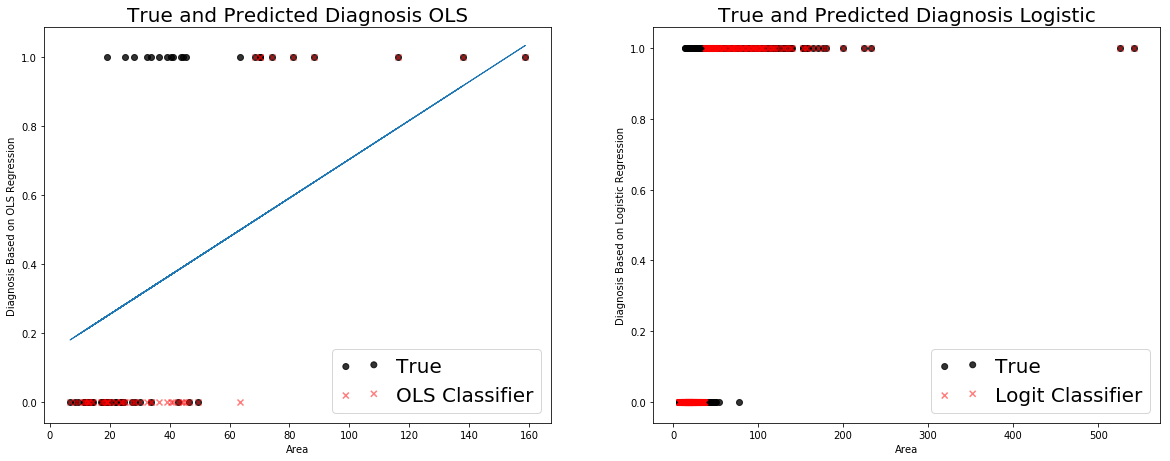

In [29]:
""" Question 6: b. How does it compare to the logistic regression model calculated in #1?

Step 6: In order to compare two methods, I plotted as the following: 

"""

import matplotlib.pyplot as plt
from matplotlib import patches
import pylab


# Plot Rating Vs Rank, Number of actors Vs Rank.
fig = plt.figure(figsize=(20, 16))
ax1 = fig.add_subplot(2, 2, 1)

#X = np.linspace(-5, 10, 569)

def model(x):
    return 1 / (1 + np.exp(-x))
loss = model((X_sample.ravel()) * logreg.coef_[0] + logreg.intercept_[0]).ravel()

"""plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)

plt.plot(X, loss, color='red', linewidth=3)"""

plt1 = ax1.scatter(X_test.ravel(), y_test, color='black', alpha=0.8, zorder=20)
plt2 = ax1.scatter(X_test.ravel(), y_binary, color='red', alpha=0.5, marker = "x", zorder=20)
ax1.plot(X_test, OLS.coef_ * X_test + OLS.intercept_, linewidth=1)
ax1.legend((plt1, plt2),("True", "OLS Classifier"), 
           scatterpoints = 2, loc = "lower right", fontsize = 20)
ax1.set_title("True and Predicted Diagnosis OLS", fontsize = 20)
ax1.set_ylabel("Diagnosis Based on OLS Regression")
ax1.set_xlabel('Area')

ax2 = fig.add_subplot(2,2,2)
plt4 = ax2.scatter(X_sample.ravel(), y_log, color='black', alpha=0.8, zorder=20)
plt3 = ax2.scatter(X_sample.ravel(), y_pred_logreg, color='red', alpha=0.5, marker = "x", zorder=20)
#ax2.plot(X_sample.ravel(), loss.ravel(), color='red', linewidth=3)
ax2.legend((plt4, plt3),("True", "Logit Classifier"), 
           scatterpoints = 2, loc = "lower right", fontsize = 20)
ax2.set_title("True and Predicted Diagnosis Logistic", fontsize = 20)
ax2.set_ylabel("Diagnosis Based on Logistic Regression")
ax2.set_xlabel('Area')


plt.show()



In [291]:
"""
*************************************************QUESTION 7*******************************************************************
"""

'\n*************************************************QUESTION 7*******************************************************************\n'

In [104]:
""" Question 7:



"""

df = pd.read_csv('admissions.csv')
df.head(8)

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0


In [171]:
""" Question 7: a. what are the mean and median GRE, GPA of students who were admitted? 
                a. What about students who were not admitted? 
                
Groupby() method by 'admit'.

"""

# Group by admit:
grouped = df.groupby([df['admit']])

# Print out the groups in a more readable fashion. 
for name, group in grouped: 
    print("Admission success: {}".format(name))
    print("GRE Mean: {}".format(group['gre'].mean()))
    print("GRE Median: {}".format(group['gre'].median()))
    print()
    print("GPA Mean: {}".format((group['gpa'].mean())))
    print("GPA Median: {}".format(group['gpa'].median()))
    print()
    print("************************")



Admission success: 0
GRE Mean: 573.5793357933579
GRE Median: 580.0

GPA Mean: 3.345404411764704
GPA Median: 3.34

************************
Admission success: 1
GRE Mean: 618.8976377952756
GRE Median: 620.0

GPA Mean: 3.4892063492063485
GPA Median: 3.545

************************


In [176]:
""" Question 7: a. What is the modal academic prestige rank among students who were admitted? 
                a. What about students who were not admitted?
                
Groupby() method by 'admit'.

"""

# Group by admit:
grouped = df.groupby([df['admit']])

# Print out the groups in a more readable fashion. 
for name, group in grouped: 
    print("Admission success: {}".format(name))
    print("Prestige Rank: {} - {}".format(group['prestige'].min(), group['prestige'].max()))
    print("Pretige Mode: {}".format(group['prestige'].mode().values))
    print()
    print("************************")



Admission success: 0
Prestige Rank: 1.0 - 4.0
Pretige Mode: [ 2.]

************************
Admission success: 1
Prestige Rank: 1.0 - 4.0
Pretige Mode: [ 2.]

************************


In [177]:
""" Question 7: b. What is the mean and median GRE score and GPA for each academic rank? 

Groupby() prestige.

"""
# Group by prestige:
grouped = df.groupby([df['prestige']])

# Print out the groups in a more readable fashion. 
for name, group in grouped: 
    print("Academic Rank: {}".format(name))
    print("GRE Mean: {}".format(group['gre'].mean()))
    print("GRE Median: {}".format(group['gre'].median()))
    print()
    print("GPA Mean: {}".format((group['gpa'].mean())))
    print("GPA Median: {}".format(group['gpa'].median()))
    print()
    print("************************")



Academic Rank: 1.0
GRE Mean: 611.8032786885246
GRE Median: 600.0

GPA Mean: 3.453114754098361
GPA Median: 3.53

************************
Academic Rank: 2.0
GRE Mean: 596.6216216216217
GRE Median: 600.0

GPA Mean: 3.364026845637583
GPA Median: 3.38

************************
Academic Rank: 3.0
GRE Mean: 574.8760330578513
GRE Median: 580.0

GPA Mean: 3.4328925619834694
GPA Median: 3.43

************************
Academic Rank: 4.0
GRE Mean: 570.1492537313433
GRE Median: 560.0

GPA Mean: 3.318358208955224
GPA Median: 3.33

************************


In [180]:
""" Question 7: b. What is the observed probability of admission for each academic rank?

There is a shortcut here:
Normally I need to count the admitted and divide it by total count since this should be treated as categorical.

However, for the original dataset, the admit is stored as numeric, with 1 represents admission and 0 means rejection. 
Thus, I can simply sum up the column and divide it by the length of the column to calculate the probability.

"""

# Group by prestige:
grouped = df.groupby([df['prestige']])

# Print out the groups in a more readable fashion. 
for name, group in grouped: 
    print("Academic Rank: {}".format(name))
    
    rate = (group['admit'].sum())/len(group['admit'])
    print("Admission Rate: {}".format(rate))

    print("************************")

Academic Rank: 1.0
Admission Rate: 0.5409836065573771
************************
Academic Rank: 2.0
Admission Rate: 0.35333333333333333
************************
Academic Rank: 3.0
Admission Rate: 0.23140495867768596
************************
Academic Rank: 4.0
Admission Rate: 0.1791044776119403
************************


In [105]:
""" Question 7: c. Fit logistic regression

Step 1: i.  Treat 'prestige' as categorical, so I input it as string.
        ii. Drop NaNs. The reason I did it in such complicated way is that the usuall df.dropnan() function did not work here.
        Thus, I have to obtain the NaN index first and drop the NaNs by index for one column, then reset the index,
        and drop the NaNs for another column based on the new NaN index. 

"""

col = ['admit', 'gre', 'gpa', 'prestige']
# Convert 'prestige' column into string:
df['prestige'] = df['prestige'].astype(str)
for column in col:
    print("Type for column {}: {}".format(column, type(df[column][0])))
    
index_list = df['gre'].index[df['gre'].isnull() == True].tolist()
print("Index that containing special characters:\n{}".format(index_list))

df=df.drop(np.array(index_list))

# Need to reset the index, otherwise the index are gone after the drop. 
df = df.reset_index(drop=True)
print(df.shape)


"""data = df.dropna(how='all')
print(data.shape)"""

Type for column admit: <class 'numpy.int64'>
Type for column gre: <class 'numpy.float64'>
Type for column gpa: <class 'numpy.float64'>
Type for column prestige: <class 'str'>
Index that containing special characters:
[187, 212]
(398, 4)


"data = df.dropna(how='all')\nprint(data.shape)"

In [106]:
""" Question 7: c. Fit logistic regression

Step 1: ii. Drop NaNs, drop the NaNs for another column based on the new NaN index. 

"""

index_list = df['gpa'].index[df['gpa'].isnull() == True].tolist()
print("Index that containing special characters:\n{}".format(index_list))

df=df.drop(np.array(index_list))

# Need to reset the index, otherwise the index are gone after the drop. 
df = df.reset_index(drop=True)
print(df.shape)

Index that containing special characters:
[234]
(397, 4)


In [108]:
""" Question 7: c. Fit logistic regression and 10-fold cross validation. 

Step 2: Fit a logistic regression. Since there is a categorical variable, I need to vectorize the independent.

"""

# Data columns
data_col = ['gre', 'gpa', 'prestige']

Original_X = df[data_col]
Original_y = df['admit']

# Dict_Vectorize the X: 
dict_data = Original_X.T.to_dict().values()

# Initiate vectorizer
vectorizer = DictVectorizer(sparse=False)

# Transform X and y: y does not need to transform. 
X = pd.DataFrame(vectorizer.fit_transform(dict_data))
y = Original_y

classifier = linear_model.LogisticRegression()
# Fit the model with all samples, in preparation for the cross validation and AIC BIC.
classifier.fit(X, y)

# Coefficients are needed for AIC and BIC's further calculation:
print("Coefficients:\n{}".format(classifier.coef_))
print()
#print("Predicted probabilities: {}".format(classifier.predict_proba(X)))
print()
print("Intercept:\n{}".format(classifier.intercept_))
print()
print("Accuracy score for all:\n{}".format(classifier.score(X, y)))
print()

# 10-fold Cross Validation
scores = cross_val_score(classifier, X, y, cv=10)
print("10 fold scores are")
print(scores)
print()
print("Average Accuracy = %.2f" % np.mean(scores))

Coefficients:
[[ 0.19596439  0.00172658  0.35943456 -0.31929464 -0.88821548 -1.10459123]]


Intercept:
[-1.95266679]

Accuracy score for all:
0.7128463476070529

10 fold scores are
[ 0.82926829  0.575       0.725       0.725       0.725       0.7
  0.71794872  0.64102564  0.74358974  0.66666667]

Average Accuracy = 0.70


In [109]:
""" Question 7: d. AIC and BIC on all data. 

Use the class Logit_AIC_BIC(), and its method aic_bic(coef, X)

"""

# Set up needed input for class:
coef = classifier.coef_
k = 3+1

# Initiate class:
admit = Logit_AIC_BIC()

# Call method
admit.aic_bic(coef, X)


AIC: -230.768054418152
BIC: -238.768054418152


In [267]:
""" Question 7: d. AIC and BIC on all data - ANOTHER WAY

I found another way to do the logistic regression with statsmodels.

However, the results are completely different, from the coefficients to AIC and BIC.

I did some research, and found that if I set the "Inverse of regularization strength", aka C, in sklearn LogisticRegression() to 
a larger number, which indicates less regularization strength, the coefficients obtained from sklearn will be closer to that from 
statsmodels. 

"""

import statsmodels.api as sm
from statsmodels.discrete.discrete_model import LogitResults

logr = sm.Logit(pd.DataFrame(y), X)
result = logr.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.082     
Dependent Variable: admit            AIC:              467.6399  
Date:               2018-02-15 15:29 BIC:              491.5435  
No. Observations:   397              Log-Likelihood:   -227.82   
Df Model:           5                LL-Null:          -248.08   
Df Residuals:       391              LLR p-value:      1.1761e-07
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
0      0.7793      0.3325     2.3438    0.0191     0.1276     1.4311
1      0.0022      0.0011     2.0280    0.0426     0.0001     0.0044
2     -3.8769      1.1425    -3.3934    0.0007    -6.1161    -1.6376
3     -4.5570      1.1134    -4.0927    0.0000    -6.7393    -2.3747
4     -5.2155      1.1514    -4.5297    0.0000    -7.4722    -2.9588
5     -5.4303      1.1399    -4.7639    0.0000    -7.6644    -3.1962
=================================================================

"""

In [111]:
""" Question 7: d. Use AIC and BIC to find the best fit for the data.  

Try evry combination of independent variables. 

Similar to Question 3, f. find all combination. 

"""

# set the size at 2:
size = 2
Ind = ["gre", "gpa", "prestige"]
# Create the combinations for chosen number of variables. 
lst_select = list(itertools.combinations(Ind,size))

#print(lst_select)

for lst in lst_select:
    data_col = list(lst)
    Original_X = df[data_col]
    Original_y = df['admit']

    # Dict_Vectorize the X: 
    dict_data = Original_X.T.to_dict().values()

    # Initiate vectorizer
    vectorizer = DictVectorizer(sparse=False)

    # Transform X and y: y does not need to transform. 
    X = pd.DataFrame(vectorizer.fit_transform(dict_data))
    y = Original_y

    classifier = linear_model.LogisticRegression()
    # Fit the model with all samples, in preparation for the cross validation and AIC BIC.
    classifier.fit(X, y)
    
    # Print the accuracy scores:
    print("Model {}:\n".format(lst))
    print()
    print("Acuracy scores: {}".format(classifier.score(X,y)))
    print()
    
    coef = classifier.coef_
    k = len(lst)+1

    # Initiate class:
    admit = Logit_AIC_BIC()

    # Call method
    
    admit.aic_bic(coef, X)
    print("Coefficients: {}".format(coef))
    print()
    print("Intercept:{}".format(classifier.intercept_))
    print("*********************************")
    print()


Model ('gre', 'gpa'):


Acuracy scores: 0.6826196473551638

AIC: -191.83355574860718
BIC: -197.83355574860718
Coefficients: [[ 0.01773589  0.00208469]]

Intercept:[-2.0331085]
*********************************

Model ('gre', 'prestige'):


Acuracy scores: 0.7027707808564232

AIC: -311.1832324261594
BIC: -317.1832324261594
Coefficients: [[ 0.00212494  0.44936252 -0.24094497 -0.78062754 -1.04065305]]

Intercept:[-1.61286304]
*********************************

Model ('gpa', 'prestige'):


Acuracy scores: 0.7002518891687658

AIC: -269.50203683452713
BIC: -275.50203683452713
Coefficients: [[ 0.42745908  0.42786986 -0.25195679 -0.86794489 -1.07512822]]

Intercept:[-1.76716004]
*********************************



In [ ]:
""" Question 7: d. Use AIC and BIC to find the best fit for the data.  

According to above results, I chose gre and prestige as the dependent variables.   

"""

In [ ]:
"""
***********************************QUESTION 8: FLAG AND RELIGION********************************************************
"""

In [127]:
""" Question 8: Step 1. Reading data

Source: https://archive.ics.uci.edu/ml/machine-learning-databases/flags/

Noted: for convenience, I did not input the full name for each column. They are simply represented by numbers in order:

1. name:	Name of the country concerned 
2. landmass:	1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania 
3. zone:	Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW 
4. area:	in thousands of square km 
5. population:	in round millions 
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others 
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others 
8. bars: Number of vertical bars in the flag 
9. stripes: Number of horizontal stripes in the flag 
10. colours: Number of different colours in the flag 
11. red: 0 if red absent, 1 if red present in the flag 
12. green: same for green 
13. blue: same for blue 
14. gold: same for gold (also yellow) 
15. white: same for white 
16. black: same for black 
17. orange: same for orange (also brown) 
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue) 
19. circles: Number of circles in the flag 
20. crosses: Number of (upright) crosses 
21. saltires: Number of diagonal crosses 
22. quarters: Number of quartered sections 
23. sunstars: Number of sun or star symbols 
24. crescent: 1 if a crescent moon symbol present, else 0 
25. triangle: 1 if any triangles present, 0 otherwise 
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0 
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise 
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise 
29. topleft: colour in the top-left corner (moving right to decide tie-breaks) 
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)

"""
# Create the column names. 
col = list(range(1,31))

# Read data file.
df = pd.read_csv('flag.data', names = col)
df.head(8)

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
5,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black
6,Anguilla,1,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
7,Antigua-Barbuda,1,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,black,red


In [128]:
""" Question 8: Step 2: Clean data

i. Drop name.
ii. Check the define to determine feature selection, otherwise, its going to be overfitted.
iii. Check the type of data and NaNs.

"""

# Drop the name column:
print("Original Shape:{}".format(df.shape))
df.drop([1], axis=1, inplace=True)

""" ii. Feature Selection by definition: Since the purpose of this question is to classify the religion based on flags, I took out irrelavant features.

Categorical:
2. landmass:	1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania 
24. crescent: 1 if a crescent moon symbol present, else 0 
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise 


Numerical:
20. crosses: Number of (upright) crosses 
21. saltires: Number of diagonal crosses 
23. sunstars: Number of sun or star symbols 
8. bars: Number of vertical bars in the flag 
9. stripes: Number of horizontal stripes in the flag 

"""

# Column names for independent variable: 

print(df.shape)

data_col = [24,28,20,21,23,8,9]

data = df[data_col]
religion = df[7]

# Clean data: check first if there is any NANs.
print(data.isnull().any()) # No NAN. If there is any, comment out the following. 
#df = data.dropna(how='all')
print()

#data[2] = data[2].astype(str)

# Check each column's type: noted that horsepower is str. 
for column in data_col:
    print("Type for column {}: {}".format(column, type(data[column][0])))
    

print()


Original Shape:(194, 30)
(194, 29)
24    False
28    False
20    False
21    False
23    False
8     False
9     False
dtype: bool

Type for column 24: <class 'numpy.int64'>
Type for column 28: <class 'numpy.int64'>
Type for column 20: <class 'numpy.int64'>
Type for column 21: <class 'numpy.int64'>
Type for column 23: <class 'numpy.int64'>
Type for column 8: <class 'numpy.int64'>
Type for column 9: <class 'numpy.int64'>



In [130]:
""" Question 8: Step 4: Binary logistic regressions.

i. combinations of pairs of binary results.

"""

# set the size at 2:
size = 2
Ind = [24,28,20,21,23,8,9]
# Create the combinations for chosen number of variables. 
lst_select = list(itertools.combinations(Ind,size))

print(lst_select)

[(24, 28), (24, 20), (24, 21), (24, 23), (24, 8), (24, 9), (28, 20), (28, 21), (28, 23), (28, 8), (28, 9), (20, 21), (20, 23), (20, 8), (20, 9), (21, 23), (21, 8), (21, 9), (23, 8), (23, 9), (8, 9)]


In [124]:
""" Question 8: Step 4: Binary logistic regressions.

ii. Iterate through each pair of columns for logistic regression.

"""

kfold_accuracy_logregr = []
all_accuracy_logregr = []
for lst in lst_select:
    data_col = list(lst)
    Original_X = data[data_col]
    y=religion

    # Dict_Vectorize the X: 
    dict_data = pd.DataFrame(Original_X).T.to_dict().values()

    # Initiate vectorizer
    vectorizer = DictVectorizer(sparse=False)

    # Transform X and y: y does not need to transform. 
    X = pd.DataFrame(vectorizer.fit_transform(dict_data))

    classifier = linear_model.LogisticRegression()
    # Fit the model with all samples, in preparation for the cross validation and AIC BIC.
    classifier.fit(X, y)
    
    # Print the accuracy scores:
    print("Model {}:\n".format(lst))
    print("Acuracy scores: {}".format(classifier.score(X,y)))
    all_accuracy_logregr.append(classifier.score(X,y))
    
    scores = cross_val_score(classifier, X, y, cv=10)
    print("10 fold scores are")
    print(scores)
    print()
    print("Average Accuracy = %.2f" % np.mean(scores))
    kfold_accuracy_logregr.append(np.mean(scores))
    
    print("*********************************")
    
print("For average accuracy on all data for all combinations:\n{}".format(np.mean((all_accuracy_logregr))))
print("For average accuracy from 10-fold CV for all combinations:\n{}".format(np.mean(kfold_accuracy_logregr)))

Model (24, 28):

Acuracy scores: 0.35051546391752575
10 fold scores are
[ 0.31818182  0.31818182  0.27272727  0.27272727  0.45        0.31578947
  0.38888889  0.35294118  0.375       0.5       ]

Average Accuracy = 0.36
*********************************
Model (24, 20):

Acuracy scores: 0.35051546391752575
10 fold scores are
[ 0.31818182  0.31818182  0.27272727  0.27272727  0.45        0.31578947
  0.38888889  0.35294118  0.375       0.5       ]

Average Accuracy = 0.36
*********************************
Model (24, 21):

Acuracy scores: 0.35051546391752575
10 fold scores are
[ 0.31818182  0.31818182  0.27272727  0.27272727  0.45        0.31578947
  0.38888889  0.35294118  0.375       0.5       ]

Average Accuracy = 0.36
*********************************
Model (24, 23):

Acuracy scores: 0.35051546391752575


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The

10 fold scores are
[ 0.31818182  0.31818182  0.27272727  0.27272727  0.45        0.31578947
  0.38888889  0.35294118  0.375       0.5       ]

Average Accuracy = 0.36
*********************************
Model (24, 8):

Acuracy scores: 0.3917525773195876
10 fold scores are
[ 0.31818182  0.27272727  0.27272727  0.36363636  0.55        0.42105263
  0.5         0.35294118  0.375       0.5625    ]

Average Accuracy = 0.40
*********************************
Model (24, 9):

Acuracy scores: 0.34536082474226804
10 fold scores are
[ 0.31818182  0.31818182  0.31818182  0.27272727  0.45        0.31578947
  0.38888889  0.29411765  0.375       0.625     ]

Average Accuracy = 0.37
*********************************
Model (28, 20):

Acuracy scores: 0.32989690721649484
10 fold scores are
[ 0.22727273  0.27272727  0.27272727  0.27272727  0.25        0.26315789
  0.33333333  0.35294118  0.375       0.3125    ]

Average Accuracy = 0.29
*********************************
Model (28, 21):

Acuracy scores: 0.30927

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The

10 fold scores are
[ 0.27272727  0.27272727  0.27272727  0.27272727  0.25        0.31578947
  0.33333333  0.35294118  0.375       0.3125    ]

Average Accuracy = 0.30
*********************************
Model (28, 23):

Acuracy scores: 0.30927835051546393
10 fold scores are
[ 0.27272727  0.27272727  0.27272727  0.27272727  0.3         0.31578947
  0.33333333  0.35294118  0.375       0.375     ]

Average Accuracy = 0.31
*********************************
Model (28, 8):

Acuracy scores: 0.35051546391752575
10 fold scores are
[ 0.27272727  0.27272727  0.27272727  0.36363636  0.4         0.42105263
  0.44444444  0.35294118  0.375       0.4375    ]

Average Accuracy = 0.36
*********************************
Model (28, 9):

Acuracy scores: 0.30412371134020616
10 fold scores are
[ 0.27272727  0.27272727  0.31818182  0.27272727  0.3         0.26315789
  0.33333333  0.23529412  0.375       0.5       ]

Average Accuracy = 0.31
*********************************
Model (20, 21):

Acuracy scores: 0.3247

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The

10 fold scores are
[ 0.22727273  0.27272727  0.27272727  0.27272727  0.3         0.26315789
  0.33333333  0.35294118  0.375       0.375     ]

Average Accuracy = 0.30
*********************************
Model (20, 23):

Acuracy scores: 0.29381443298969073
10 fold scores are
[ 0.18181818  0.27272727  0.31818182  0.31818182  0.25        0.21052632
  0.38888889  0.29411765  0.3125      0.25      ]

Average Accuracy = 0.28
*********************************
Model (20, 8):

Acuracy scores: 0.34536082474226804
10 fold scores are
[ 0.27272727  0.27272727  0.27272727  0.36363636  0.4         0.36842105
  0.38888889  0.35294118  0.375       0.4375    ]

Average Accuracy = 0.35
*********************************
Model (20, 9):

Acuracy scores: 0.37628865979381443
10 fold scores are
[ 0.36363636  0.31818182  0.36363636  0.31818182  0.4         0.26315789
  0.44444444  0.35294118  0.4375      0.5       ]

Average Accuracy = 0.38
*********************************
Model (21, 23):

Acuracy scores: 0.3092

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The

10 fold scores are
[ 0.27272727  0.27272727  0.27272727  0.27272727  0.3         0.31578947
  0.33333333  0.35294118  0.375       0.3125    ]

Average Accuracy = 0.31
*********************************
Model (21, 8):

Acuracy scores: 0.35051546391752575
10 fold scores are
[ 0.27272727  0.27272727  0.27272727  0.36363636  0.4         0.36842105
  0.44444444  0.35294118  0.375       0.4375    ]

Average Accuracy = 0.36
*********************************
Model (21, 9):

Acuracy scores: 0.3556701030927835
10 fold scores are
[ 0.36363636  0.27272727  0.31818182  0.27272727  0.4         0.26315789
  0.33333333  0.35294118  0.4375      0.5       ]

Average Accuracy = 0.35
*********************************
Model (23, 8):

Acuracy scores: 0.35051546391752575
10 fold scores are
[ 0.27272727  0.22727273  0.27272727  0.36363636  0.4         0.42105263
  0.44444444  0.35294118  0.375       0.4375    ]

Average Accuracy = 0.36
*********************************
Model (23, 9):

Acuracy scores: 0.3453608

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The

10 fold scores are
[ 0.36363636  0.27272727  0.27272727  0.27272727  0.35        0.26315789
  0.38888889  0.29411765  0.4375      0.4375    ]

Average Accuracy = 0.34
*********************************
Model (8, 9):

Acuracy scores: 0.35051546391752575
10 fold scores are
[ 0.27272727  0.27272727  0.31818182  0.31818182  0.4         0.36842105
  0.44444444  0.29411765  0.375       0.4375    ]

Average Accuracy = 0.35
*********************************
For average accuracy on all data for all combinations:
0.34020618556701027
For average accuracy from 10-fold CV for all combinations:
0.34032757919754825


In [131]:
""" Question 8: Step 9: Multinomial logistic regression.

Multinomial logistic. Set parameter "multi_class" to "multinomial". I also need to set the solver to ‘lbfgs’.

"""

data_col = [24,28,20,21,23,8,9]

data = df[data_col]
religion = df[7]

# Dict_Vectorize the X: 
dict_data = data.T.to_dict().values()

# Initiate vectorizer
vectorizer = DictVectorizer(sparse=False)

# Transform X and y: y does not need to transform. 
X = pd.DataFrame(vectorizer.fit_transform(dict_data))
y = religion

classifier = linear_model.LogisticRegression(multi_class = "multinomial", 
                                            solver = 'lbfgs')
# Fit the model with all samples, in preparation for the cross validation and AIC BIC.
classifier.fit(X, y)

# Accuracy score for multinomial:
print("Accuracy score: {}".format(classifier.score(X,y)))
print()


Accuracy score: 0.4536082474226804



In [ ]:
"""
******************************************QUESTION 9: FINAL PROJECT***********************************************************
"""

In [110]:
""" Question 9: Step 1: read in data.

"""

df = pd.read_csv('autos.csv', sep=',', header=0, encoding='cp1252')
print(df.shape)
df.head(8)

(371528, 20)


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58


In [111]:
""" Question 9: Step 2: Clean data

i. drop data.

"""

df.drop(['dateCrawled', 'name', 'seller', 'offerType', 'abtest', 'model', 'notRepairedDamage', 'monthOfRegistration', 'dateCreated', 'nrOfPictures', 'lastSeen'], axis=1, inplace=True)
print(df.shape)

(371528, 9)


In [112]:
"""Question 9: Step 2: Clean data

ii. Check NaNs.drop NaNs.

"""

print(df.isnull().any()) # No NAN. If there is any, comment out the following. 
print()

print(df.shape)


vehicleType            False
yearOfRegistration     False
gearbox                False
powerPS                False
kilometer              False
monthOfRegistration    False
fuelType               False
brand                  False
dtype: bool

(371528, 9)


In [114]:
df.head(8)

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,brand,postalCode
0,18300,coupe,2011,manuell,190,125000,diesel,audi,66954
1,9800,suv,2004,automatik,163,125000,diesel,jeep,90480
2,1500,kleinwagen,2001,manuell,75,150000,benzin,volkswagen,91074
3,3600,kleinwagen,2008,manuell,69,90000,diesel,skoda,60437
4,650,limousine,1995,manuell,102,150000,benzin,bmw,33775
5,2200,cabrio,2004,manuell,109,150000,benzin,peugeot,67112
6,0,limousine,1980,manuell,50,40000,benzin,volkswagen,19348
7,14500,bus,2014,manuell,125,30000,benzin,ford,94505


In [113]:
"""Question 9: Step 2: Clean data

iii. Drop NaNs.

"""
# Nans in vehivle type:
index_list = df['vehicleType'].index[df['vehicleType'].isnull() == True].tolist()
# print("Index that containing special characters:\n{}".format(index_list))

df=df.drop(np.array(index_list))

# Need to reset the index, otherwise the index are gone after the drop. 
df = df.reset_index(drop=True)
print("Dataframe shape after dropping the NaNs in vehicleType:\n{}".format(df.shape))


# Nans in fuel type
index_list = df['fuelType'].index[df['fuelType'].isnull() == True].tolist()
# print("Index that containing special characters:\n{}".format(index_list))

df=df.drop(np.array(index_list))

# Need to reset the index, otherwise the index are gone after the drop. 
df = df.reset_index(drop=True)
print("Dataframe shape after dropping the NaNs in fuelType:\n{}".format(df.shape))


# Nans in gearbox
index_list = df['gearbox'].index[df['gearbox'].isnull() == True].tolist()
# print("Index that containing special characters:\n{}".format(index_list))

df=df.drop(np.array(index_list))

# Need to reset the index, otherwise the index are gone after the drop. 
df = df.reset_index(drop=True)
print("Dataframe shape after dropping the NaNs in fuelType:\n{}".format(df.shape))

Dataframe shape after dropping the NaNs in vehicleType:
(333659, 9)
Dataframe shape after dropping the NaNs in fuelType:
(317768, 9)
Dataframe shape after dropping the NaNs in fuelType:
(309900, 9)


In [116]:
""" Question 9: Step 3: Standardize numerical data:


"""

num_col = ['price', 'powerPS', 'kilometer']
cat_col = ['yearOfRegistration']

for column in num_col:
    mean = df[column].mean()
    std = df[column].std()
    df[column] = (df[column]-mean)/std


data[cat_col] = data[cat_col].astype(str)

df.head(8)



,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,brand,postalCode
0,0.000625,coupe,2011,manuell,0.371500,-0.005624,diesel,audi,66954
1,-0.001564,suv,2004,automatik,0.220482,-0.005624,diesel,jeep,90480
2,-0.003701,kleinwagen,2001,manuell,-0.271725,0.626713,benzin,volkswagen,91074
3,-0.003160,kleinwagen,2008,manuell,-0.305284,-0.890896,diesel,skoda,60437
4,-0.003919,limousine,1995,manuell,-0.120707,0.626713,benzin,bmw,33775
5,-0.003520,cabrio,2004,manuell,-0.081554,0.626713,benzin,peugeot,67112
6,-0.004087,limousine,1980,manuell,-0.411556,-2.155570,benzin,volkswagen,19348
7,-0.000354,bus,2014,manuell,0.007938,-2.408504,benzin,ford,94505


In [121]:
"""Question 9: Step 3: Linear regression.

i. Use AIC/BIC to choose for all data.
ii. Use 10-fold cross validation, and get the mean scores. 

"""

data_col = ['vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'kilometer', 'fuelType', 'brand']


data = df[data_col]
price = df['price']

# Dict_Vectorize the X: 
dict_data = data.T.to_dict().values()

# Initiate vectorizer
vectorizer = DictVectorizer(sparse=False)

# Transform X and y: y does not need to transform. 
X = pd.DataFrame(vectorizer.fit_transform(dict_data))
y = price

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y)

# Make predictions using the testing set
y_pred = regr.predict(X)

# Sum of squared error, aka residual sum of squares. 
print("All Data: Sum of squared error, aka residual sum of squares.: %.2f"
      % ((mean_squared_error(y, y_pred))*len(y)))
print()


# AIC/BIC
k = len(data_col)+1
n = len(y)

mean_sq_er_total = mean_squared_error(y, y_pred)
 
# AIC and BIC for All coefficients
aic_total = (2*k) + n * np.log(mean_sq_er_total)
print("AIC:{} ".format(aic_total))
bic_total = k * np.log(n) + n * np.log(mean_sq_er_total)
print("BIC:{} ".format(bic_total))
print("*******************************************")
print()  



# 10-fold Cross Validation

# Inditiate KFold.
kf = KFold(n_splits=10)

# Split data into 10 folds.
s = kf.split(X)
n = kf.get_n_splits(X)
print("Splitted into {} folds".format(n))

# Initiate regression.
# Create linear regression object
regr = linear_model.LinearRegression()

R2_KFold = []
# Cross-validation.
for train_index, test_index in kf.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    # Predict.
    y_pred = regr.predict(X_test)
    
    R2_KFold.append(r2_score(y_test, y_pred))

print('Average coverage: {}'.format(np.mean(R2_KFold)))

All Data: Sum of squared error, aka residual sum of squares.: 307425.42

AIC:-2468.510066291117 
BIC:-2383.35802674091 
*******************************************

Splitted into 10 folds
Average coverage: -10.106986505414435


In [130]:
"""Question 9: Step 4: Choose the feature combinations for better model.

i. Create a class for model combinations. 

"""

def models(size):
    # Define other independent variables for me to choose from. 
    Ind = ['vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'kilometer', 'fuelType', 'brand']
    # Create the combinations for chosen number of variables. 
    lst_select = list(itertools.combinations(Ind,size))
    print("Model Selected:")
    print()
    

    print()
    return lst_select


"\n    # Create the final model selection list. \n    lst_models = []\n    for ele in lst_select:\n        lst_main = ['vehicleType']\n        lst_main.extend(ele)\n        lst_models.append(lst_main)"

In [132]:
""" Question 9: Step 3: Find a better fit.

ii. Set the number of features of interest to 2, and generate the list of feature combinations. 

"""

model_lst = models(2)
print(model_lst)

Model Selected:


[('vehicleType', 'yearOfRegistration'), ('vehicleType', 'gearbox'), ('vehicleType', 'powerPS'), ('vehicleType', 'kilometer'), ('vehicleType', 'fuelType'), ('vehicleType', 'brand'), ('yearOfRegistration', 'gearbox'), ('yearOfRegistration', 'powerPS'), ('yearOfRegistration', 'kilometer'), ('yearOfRegistration', 'fuelType'), ('yearOfRegistration', 'brand'), ('gearbox', 'powerPS'), ('gearbox', 'kilometer'), ('gearbox', 'fuelType'), ('gearbox', 'brand'), ('powerPS', 'kilometer'), ('powerPS', 'fuelType'), ('powerPS', 'brand'), ('kilometer', 'fuelType'), ('kilometer', 'brand'), ('fuelType', 'brand')]


In [134]:
for col in model_lst:
    print("*******************Model {}************************".format(col))
    data = df[list(col)]
    price = df['price']

    # Dict_Vectorize the X: 
    dict_data = data.T.to_dict().values()

    # Initiate vectorizer
    vectorizer = DictVectorizer(sparse=False)

    # Transform X and y: y does not need to transform. 
    X = pd.DataFrame(vectorizer.fit_transform(dict_data))
    y = price

    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X, y)

    # Make predictions using the testing set
    y_pred = regr.predict(X)

    # Sum of squared error, aka residual sum of squares. 
    print("All Data: Sum of squared error, aka residual sum of squares.: %.2f"
          % ((mean_squared_error(y, y_pred))*len(y)))
    print()
    print("Coefficients:{} ".format(regr.coef_))


    # AIC/BIC
    k = len(col)+1
    n = len(y)

    mean_sq_er_total = mean_squared_error(y, y_pred)
 
    # AIC and BIC for All coefficients
    aic_total = (2*k) + n * np.log(mean_sq_er_total)
    print("AIC:{} ".format(aic_total))
    bic_total = k * np.log(n) + n * np.log(mean_sq_er_total)
    print("BIC:{} ".format(bic_total))
    print()  



    # 10-fold Cross Validation

    # Inditiate KFold.
    kf = KFold(n_splits=10)

    # Split data into 10 folds.
    s = kf.split(X)
    n = kf.get_n_splits(X)
    print("Splitted into {} folds".format(n))

    # Initiate regression.
    # Create linear regression object
    regr = linear_model.LinearRegression()

    R2_KFold = []
    # Cross-validation.
    for train_index, test_index in kf.split(X, y):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model using the training sets
        regr.fit(X_train, y_train)
        # Predict.
        y_pred = regr.predict(X_test)
    
        R2_KFold.append(r2_score(y_test, y_pred))

    print('Average coverage from 10-fold: {}'.format(np.mean(R2_KFold)))

*******************Model ('vehicleType', 'yearOfRegistration')************************
All Data: Sum of squared error, aka residual sum of squares.: 309783.29

Coefficients:[ -4.58014496e+07  -4.58014498e+07  -4.58014498e+07  -4.58014498e+07
  -4.58014498e+07  -4.58014498e+07  -4.58014498e+07  -4.58014498e+07
  -1.42104842e-04] 
AIC:-110.73357821734983 
BIC:-78.80156338602231 

Splitted into 10 folds
Average coverage from 10-fold: -0.5718700087537816
*******************Model ('vehicleType', 'gearbox')************************
All Data: Sum of squared error, aka residual sum of squares.: 309783.53

Coefficients:[  3.85804587e+03   3.85804507e+03   1.17617683e+07   1.17617681e+07
   1.17617681e+07   1.17617681e+07   1.17617681e+07   1.17617681e+07
   1.17617681e+07   1.17617681e+07] 
AIC:-110.48696779439244 
BIC:-78.55495296306492 

Splitted into 10 folds
Average coverage from 10-fold: -0.5681833296763298
*******************Model ('vehicleType', 'powerPS')************************
All Data

Average coverage from 10-fold: -0.08816822668837827
*******************Model ('powerPS', 'fuelType')************************
All Data: Sum of squared error, aka residual sum of squares.: 307663.27

Coefficients:[ -1.38400420e+08  -1.38400424e+08  -1.38400424e+08  -1.38400424e+08
  -1.38400424e+08  -1.38400424e+08  -1.38400424e+08   8.60831636e-03] 
AIC:-2238.838396386464 
BIC:-2206.9063815551362 

Splitted into 10 folds
Average coverage from 10-fold: -9.150065002200513
*******************Model ('powerPS', 'brand')************************
All Data: Sum of squared error, aka residual sum of squares.: 309741.94

Coefficients:[  3.01974413e+07   3.01974413e+07   3.01974413e+07   3.01974413e+07
   3.01974413e+07   3.01974413e+07   3.01974413e+07   3.01974413e+07
   3.01974413e+07   3.01974413e+07   3.01974413e+07   3.01974413e+07
   3.01974413e+07   3.01974413e+07   3.01974413e+07   3.01974413e+07
   3.01974413e+07   3.01974413e+07   3.01974413e+07   3.01974413e+07
   3.01974413e+07   3.019